# Caracterização mereológica da área de estudo

Nesta atividade caracterizaremos a metereologia da área de estudo. Avaliaremos os seguintes pontos:

1. Metereologia da superfície
2. Metereologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Metereologia da superfície
Analisaremos os dados de metar (estação mereológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR. \ 
Os dados coletados são do município de Curitiba, pois os dados do município de Joinville não permitem levantar os dados necessários para plena conclusão da presente ativide, portanto, Curitiba se tornou o local de medição mais próximo da industria ArcellorMittal Vega, localizada em São Franscisco do Sul.
Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

In [140]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficieCuritiba'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira
C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira\inputs\meteoSuperficieCuritiba
['metar.2023.csv']


In [141]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws       hc  ccp  cco  \
0       1      1  2023     0 NaN  110.0  3.086664   609.60  6.0  6.0   
1       1      1  2023     1 NaN  100.0  2.057776   426.72  6.0  6.0   
2       1      1  2023     2 NaN   90.0  2.572220   426.72  6.0  6.0   
3       1      1  2023     3 NaN  120.0  2.572220   426.72  6.0  6.0   
4       1      1  2023     4 NaN  110.0  2.572220   426.72  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...      ...  ...  ...   
8731   30     12  2023    19 NaN  110.0  5.658884  1066.80  6.0  6.0   
8732   30     12  2023    20 NaN   90.0  4.629996   914.40  1.0  1.0   
8733   30     12  2023    21 NaN  100.0  4.629996   609.60  3.0  3.0   
8734   30     12  2023    22 NaN  100.0  4.629996   609.60  6.0  6.0   
8735   30     12  2023    23 NaN   80.0  3.086664   304.80  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh  
0     1009.640461  19.0    19.0  NaN  0.0  100.00  
1     1009.640461  19.0    19.0

In [142]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8731   2023-12-30 19:00:00
8732   2023-12-30 20:00:00
8733   2023-12-30 21:00:00
8734   2023-12-30 22:00:00
8735   2023-12-30 23:00:00
Name: datetime, Length: 8736, dtype: datetime64[ns]


day  month  year  hour  ct     wd        ws       hc  \
datetime                                                                    
2023-01-01 00:00:00    1      1  2023     0 NaN  110.0  3.086664   609.60   
2023-01-01 01:00:00    1      1  2023     1 NaN  100.0  2.057776   426.72   
2023-01-01 02:00:00    1      1  2023     2 NaN   90.0  2.572220   426.72   
2023-01-01 03:00:00    1      1  2023     3 NaN  120.0  2.572220   426.72   
2023-01-01 04:00:00    1      1  2023     4 NaN  110.0  2.572220   426.72   
...                  ...    ...   ...   ...  ..    ...       ...      ...   
2023-12-30 19:00:00   30     12  2023    19 NaN  110.0  5.658884  1066.80   
2023-12-30 20:00:00   30     12  2023    20 NaN   90.0  4.629996   914.40   
2023-12-30 21:00:00   30     12  2023    21 NaN  100.0  4.629996   609.60   
2023-12-30 22:00:00   30     12  2023    22 NaN  100.0  4.629996   609.60   
2023-12-30 23:00:00   30     12  2023    23 NaN   80.0  3.086664   304.80   

                     ccp  cco            p  temp  dpTemp  vis   pw    relh  \
datetime                                                                     
2023-01-01 00:00:00  6.0  6.0  1009.640461  19.0    19.0  NaN  0.0  100.00   
2023-01-01 01:00:00  6.0  6.0  1009.640461  19.0    19.0  NaN  0.0  100.00   
2023-01-01 02:00:00  6.0  6.0  1009.636867  19.0    19.0  NaN  0.0  100.00   
2023-01-01 03:00:00  6.0  6.0  1009.640461  19.0    19.0  NaN  0.0  100.00   
2023-01-01 04:00:00  6.0  6.0  1009.640461  19.0    19.0  NaN  0.0  100.00   
...                  ...  ...          ...   ...     ...  ...  ...     ...   
2023-12-30 19:00:00  6.0  6.0  1009.644054  22.0    16.0  NaN  0.0   68.75   
2023-12-30 20:00:00  1.0  1.0  1009.647648  21.0    16.0  NaN  0.0   73.09   
2023-12-30 21:00:00  3.0  3.0  1009.647648  20.0    17.0  NaN  0.0   82.86   
2023-12-30 22:00:00  6.0  6.0  1009.644054  18.0    16.0  NaN  0.0   88.09   
2023-12-30 23:00:00  6.0  6.0  1009.644054  18.0    16.0  NaN  0.0   88.09   

                               datetime  
datetime                                 
2023-01-01 00:00:00 2023-01-01 00:00:00  
2023-01-01 01:00:00 2023-01-01 01:00:00  
2023-01-01 02:00:00 2023-01-01 02:00:00  
2023-01-01 03:00:00 2023-01-01 03:00:00  
2023-01-01 04:00:00 2023-01-01 04:00:00  
...                                 ...  
2023-12-30 19:00:00 2023-12-30 19:00:00  
2023-12-30 20:00:00 2023-12-30 20:00:00  
2023-12-30 21:00:00 2023-12-30 21:00:00  
2023-12-30 22:00:00 2023-12-30 22:00:00  
2023-12-30 23:00:00 2023-12-30 23:00:00  

[8736 rows x 17 columns]

## Etapa 1
Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

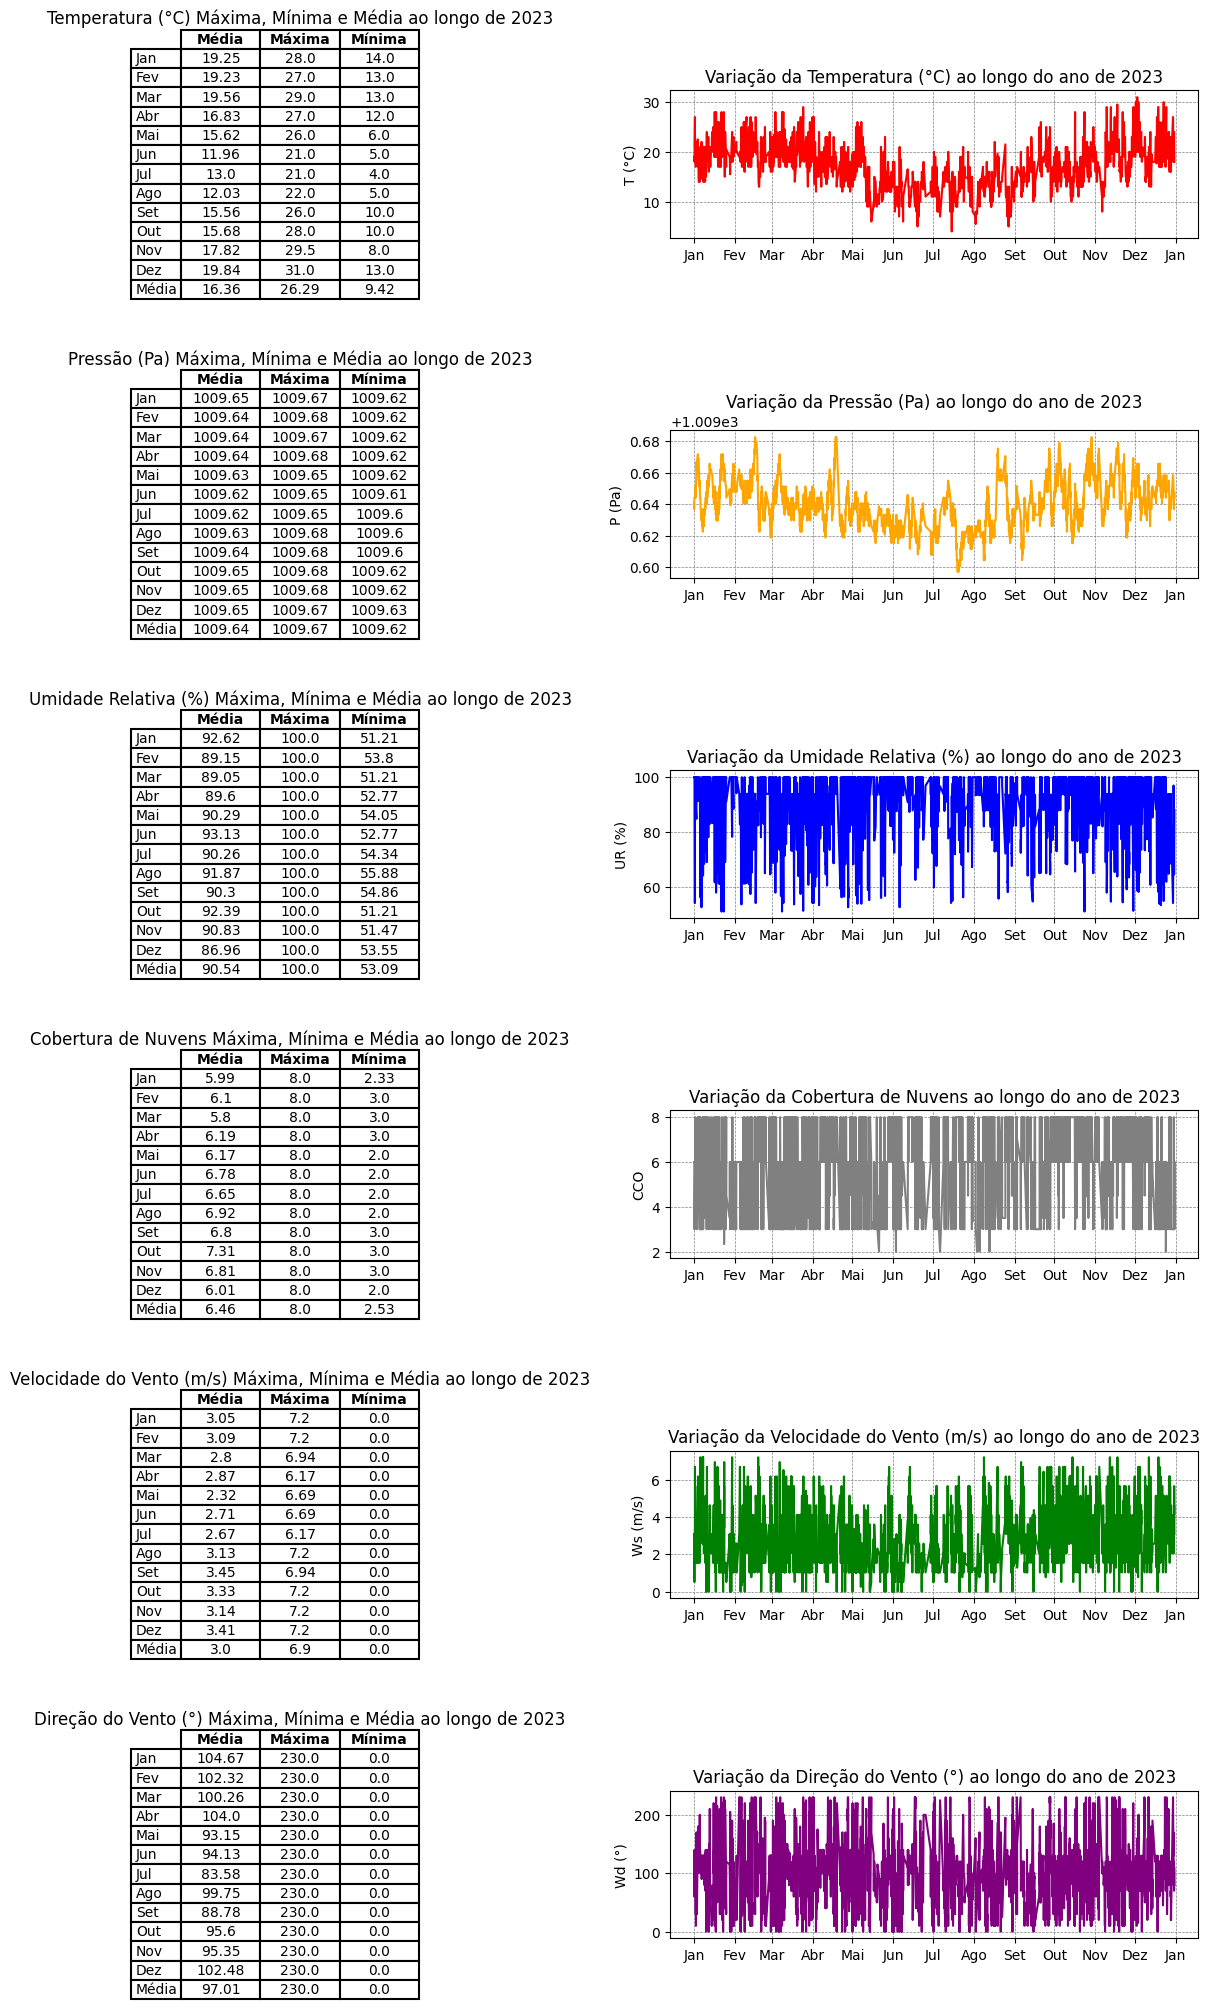

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import matplotlib.dates as mdates

# Função para remover outliers usando o método do IQR
def remover_outliers_iqr(df, coluna):
    if coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
        return df_filtrado
    else:
        print(f"Coluna '{coluna}' não encontrada no DataFrame.")
        return df

# Removendo outliers de cada coluna relevante
colunas_para_verificar = ['temp', 'p', 'relh', 'cco', 'ws', 'wd']
for col in colunas_para_verificar:
    metSuperficie = remover_outliers_iqr(metSuperficie, col)

# Lista dos nomes para os eixos y e cores correspondentes
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CCO', 'Ws (m/s)', 'Wd (°)']
cores = ['red', 'orange', 'blue', 'gray', 'green', 'purple']

# Lista de títulos para os gráficos
titulos = ['Temperatura (°C)', 'Pressão (Pa)', 'Umidade Relativa (%)', 'Cobertura de Nuvens', 'Velocidade do Vento (m/s)', 'Direção do Vento (°)']

# Mapeamento dos nomes dos meses para português abreviado
meses_abreviados_pt = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Função para formatar os meses em português
def formatar_mes(x, pos):
    mes = int(mdates.num2date(x).month)
    return meses_abreviados_pt[mes - 1]

# Criando tabelas de estatísticas mensais e gráficos
fig, axs = plt.subplots(6, 2, figsize=(15, 24))

# Adicionar títulos
for i, col in enumerate(colunas_para_verificar):
    # Extraindo o mês dos dados datetime
    metSuperficie['mes'] = metSuperficie['datetime'].dt.month
    
    # Agrupar por mês e calcular estatísticas
    estatisticas_mensais = metSuperficie.groupby('mes')[col].agg(['mean', 'max', 'min']).round(2)
    
    # Calcular a média das estatísticas
    media_geral = estatisticas_mensais.mean().to_frame().T.round(2)
    media_geral.index = ['Média']
    
    # Adicionar a linha de médias ao DataFrame
    estatisticas_mensais = pd.concat([estatisticas_mensais, media_geral])
    
    # Plotar a tabela
    axs[i, 0].axis('off')
    tabela = axs[i, 0].table(cellText=estatisticas_mensais.values, 
                             colLabels=['Média', 'Máxima', 'Mínima'], 
                             rowLabels=meses_abreviados_pt + ['Média'],
                             cellLoc='center', 
                             loc='center')
    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1.2, 1.2)
    titulo_tabela = axs[i, 0].text(0.5, 1.45, f'{titulos[i]} Máxima, Mínima e Média ao longo de 2023',
                                   fontsize=12, ha='center', transform=axs[i, 0].transAxes)
    
    # Ajustar a largura das colunas para caber o título e aumentar a espessura das linhas
    for key, cell in tabela.get_celld().items():
        cell.set_width(0.15)
        cell.set_edgecolor('black')
        cell.set_linewidth(1.5)  # Ajustar a espessura das linhas
        if key[0] == 0:  # Linha do cabeçalho
            cell.set_fontsize(10)
            cell.set_height(0.13)
            cell.set_text_props(weight='bold')
        else:  # Linhas de valores
            cell.set_height(0.13)  # Aumentar a altura das linhas de valores

    # Plotar o gráfico
    axs[i, 1].plot(metSuperficie['datetime'], metSuperficie[col], color=cores[i])
    axs[i, 1].set_ylabel(nomes_eixos_y[i])
    axs[i, 1].set_title(f'Variação da {titulos[i]} ao longo do ano de 2023')
    axs[i, 1].grid(True, color='gray', linestyle='--', linewidth=0.5)
    axs[i, 1].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i, 1].xaxis.set_major_formatter(plt.FuncFormatter(formatar_mes))

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=1.3)

plt.show()

O percentil 99 da temperatura é: 27.0
O percentil 99 da pressão é: 1009.6751986793704
O percentil 99 da umidade relativa é: 100.0
O percentil 99 da cobertura de nuvens é: 8.0
O percentil 99 da velocidade do vento é: 6.687772
O percentil 99 da direção do vento é: 230.0


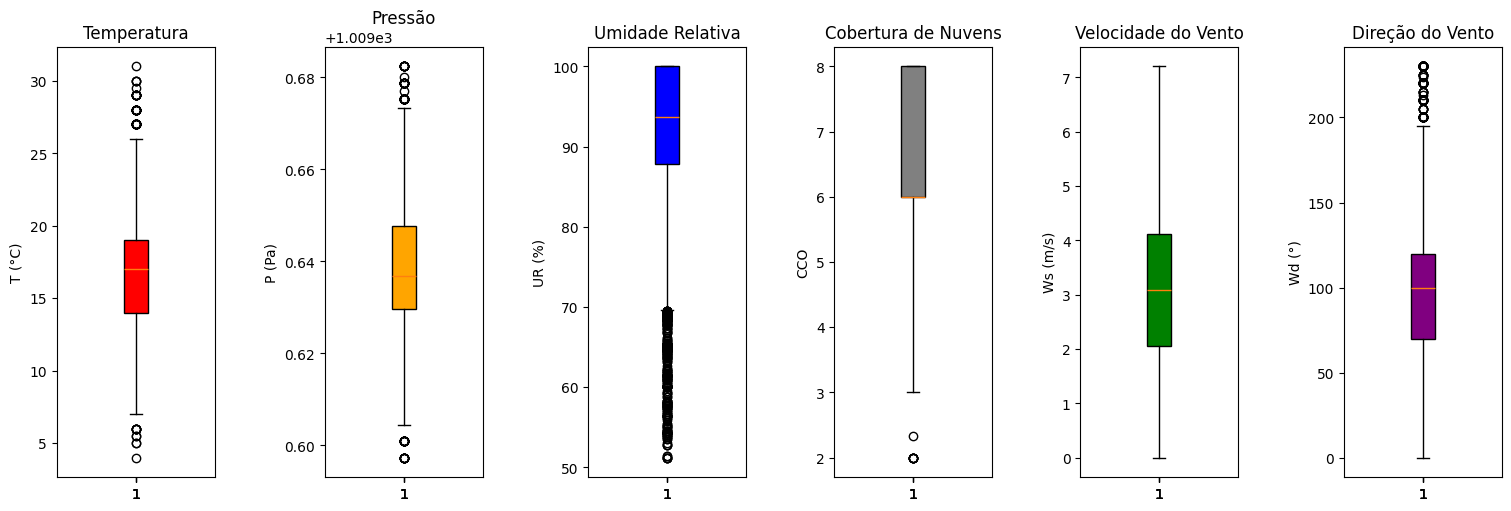

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Fazendo boxplot das variáveis
fig, ax = plt.subplots(1, 6, sharex=True, figsize=(15, 5), constrained_layout=True, 
                       gridspec_kw={'wspace': 0.2})  # Evitando sobreposições

# Lista dos nomes para os eixos y
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CCO', 'Ws (m/s)', 'Wd (°)']

# Formatando os gráficos
boxplot_temp = ax[0].boxplot(metSuperficie['temp'], patch_artist=True)
ax[0].set_title('Temperatura')
ax[0].set_ylabel(nomes_eixos_y[0])  # Adicionando título no eixo y
for patch in boxplot_temp['boxes']:
    patch.set_facecolor('red')

boxplot_p = ax[1].boxplot(metSuperficie['p'], patch_artist=True)
ax[1].set_title('Pressão')
ax[1].set_ylabel(nomes_eixos_y[1])  # Adicionando título no eixo y
for patch in boxplot_p['boxes']:
    patch.set_facecolor('orange')

boxplot_relh = ax[2].boxplot(metSuperficie['relh'], patch_artist=True)
ax[2].set_title('Umidade Relativa')
ax[2].set_ylabel(nomes_eixos_y[2])  # Adicionando título no eixo y
for patch in boxplot_relh['boxes']:
    patch.set_facecolor('blue')

# Tratando valores NaN para cobertura de nuvens (cco)
cco_validos = metSuperficie['cco'].dropna()
boxplot_cco = ax[3].boxplot(cco_validos, patch_artist=True)
ax[3].set_title('Cobertura de Nuvens')
ax[3].set_ylabel(nomes_eixos_y[3])  # Adicionando título no eixo y
for patch in boxplot_cco['boxes']:
    patch.set_facecolor('gray')

boxplot_ws = ax[4].boxplot(metSuperficie['ws'], patch_artist=True)
ax[4].set_title('Velocidade do Vento')
ax[4].set_ylabel(nomes_eixos_y[4])  # Adicionando título no eixo y
for patch in boxplot_ws['boxes']:
    patch.set_facecolor('green')

# Tratando valores NaN para inclinação do vento (wd)
wd_validos = metSuperficie['wd'].dropna()
boxplot_wd = ax[5].boxplot(wd_validos, patch_artist=True)
ax[5].set_title('Direção do Vento')
ax[5].set_ylabel(nomes_eixos_y[5])  # Adicionando título no eixo y
for patch in boxplot_wd['boxes']:
    patch.set_facecolor('purple')

# Removendo valores acima do percentil 99°
temp99 = np.percentile(metSuperficie['temp'], 99)
p99 = np.percentile(metSuperficie['p'], 99)
relh99 = np.percentile(metSuperficie['relh'], 99)
cco99 = np.nanpercentile(cco_validos, 99)  # Usando apenas valores válidos de cco
ws99 = np.nanpercentile(metSuperficie['ws'], 99)
wd99 = np.nanpercentile(wd_validos, 99)  # Usando apenas valores válidos de wd

print('O percentil 99 da temperatura é:', temp99)
print('O percentil 99 da pressão é:', p99)
print('O percentil 99 da umidade relativa é:', relh99)
print('O percentil 99 da cobertura de nuvens é:', cco99)
print('O percentil 99 da velocidade do vento é:', ws99)
print('O percentil 99 da direção do vento é:', wd99)

plt.show()

In [145]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('MS').mean()
min_mensal = metSuperficie.resample('MS').min()
max_mensal = metSuperficie.resample('MS').max()

# Títulos dos DataFrames
titulos = ["Média Mensal", "Mínimo Mensal", "Máximo Mensal"]

# DataFrames e seus respectivos títulos
dataframes = [media_mensal, min_mensal, max_mensal]
dataframes_com_titulos = dict(zip(titulos, dataframes))

# Mostrar as estatísticas
for titulo, dataframe in dataframes_com_titulos.items():
    print(f"\n{titulo}\n")
    display(dataframe)


Média Mensal



day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2023-01-01  13.992593    1.0  2023.0  11.071605 NaN  104.666667  3.050886   
2023-02-01  16.627517    2.0  2023.0  10.993289 NaN  102.321029  3.085513   
2023-03-01  15.821192    3.0  2023.0  10.854305 NaN  100.257542  2.800105   
2023-04-01  15.392324    4.0  2023.0  10.950959 NaN  103.997868  2.869296   
2023-05-01  15.573370    5.0  2023.0  10.288043 NaN   93.145380  2.321755   
2023-06-01  14.669202    6.0  2023.0  10.524715 NaN   94.131812  2.708818   
2023-07-01  16.022039    7.0  2023.0  11.088154 NaN   83.576676  2.671188   
2023-08-01  17.901493    8.0  2023.0  10.997015 NaN   99.753731  3.133118   
2023-09-01  17.471976    9.0  2023.0  10.911504 NaN   88.780236  3.447913   
2023-10-01  15.484461   10.0  2023.0  11.104205 NaN   95.600244  3.325860   
2023-11-01  16.636986   11.0  2023.0  10.650685 NaN   95.353881  3.135994   
2023-12-01  14.284672   12.0  2023.0  10.956204 NaN  102.475669  3.405114   

                     hc       ccp       cco            p       temp  \
datetime                                                              
2023-01-01  1119.117728  6.240741  5.989712  1009.646180  19.254938   
2023-02-01  1119.338792  6.197987  6.104027  1009.643120  19.229866   
2023-03-01  1048.442472  5.922001  5.800589  1009.640759  19.559603   
2023-04-01   617.842814  6.291756  6.189410  1009.638696  16.825871   
2023-05-01   610.870000  6.221920  6.170290  1009.632012  15.625000   
2023-06-01   504.561825  6.864385  6.783904  1009.623730  11.963245   
2023-07-01   706.217961  6.806703  6.651056  1009.623118  13.003214   
2023-08-01   540.064657  7.018408  6.921891  1009.629748  12.025373   
2023-09-01   695.375575  6.893314  6.798427  1009.636598  15.560275   
2023-10-01   670.049214  7.428702  7.307434  1009.646367  15.683729   
2023-11-01   855.110137  6.919330  6.808219  1009.647190  17.824201   
2023-12-01   667.840779  6.050689  6.005677  1009.645968  19.842052   

               dpTemp  vis   pw       relh   mes  
datetime                                          
2023-01-01  17.842798  NaN  0.0  92.618619   1.0  
2023-02-01  17.253356  NaN  0.0  89.147310   2.0  
2023-03-01  17.565857  NaN  0.0  89.050486   3.0  
2023-04-01  14.961976  NaN  0.0  89.604581   4.0  
2023-05-01  13.891757  NaN  0.0  90.286943   5.0  
2023-06-01  10.820659  NaN  0.0  93.129043   6.0  
2023-07-01  11.334711  NaN  0.0  90.260730   7.0  
2023-08-01  10.665920  NaN  0.0  91.866321   8.0  
2023-09-01  13.893904  NaN  0.0  90.295223   9.0  
2023-10-01  14.390920  NaN  0.0  92.387690  10.0  
2023-11-01  16.210046  NaN  0.0  90.832911  11.0  
2023-12-01  17.400243  NaN  0.0  86.958110  12.0


Mínimo Mensal



day  month  year  hour  ct   wd   ws     hc  ccp       cco  \
datetime                                                                 
2023-01-01    1      1  2023     0 NaN  0.0  0.0  30.48  3.0  2.333333   
2023-02-01    1      2  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-03-01    1      3  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-04-01    1      4  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-05-01    1      5  2023     0 NaN  0.0  0.0  30.48  2.0  2.000000   
2023-06-01    1      6  2023     0 NaN  0.0  0.0  30.48  2.0  2.000000   
2023-07-01    1      7  2023     0 NaN  0.0  0.0  30.48  2.0  2.000000   
2023-08-01    2      8  2023     0 NaN  0.0  0.0  30.48  2.0  2.000000   
2023-09-01    1      9  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-10-01    1     10  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-11-01    1     11  2023     0 NaN  0.0  0.0  30.48  3.0  3.000000   
2023-12-01    1     12  2023     0 NaN  0.0  0.0  30.48  2.0  2.000000   

                      p  temp  dpTemp  vis   pw   relh  mes  
datetime                                                     
2023-01-01  1009.622493  14.0    11.0  NaN  0.0  51.21    1  
2023-02-01  1009.618900  13.0    11.0  NaN  0.0  53.80    2  
2023-03-01  1009.622493  13.0    13.0  NaN  0.0  51.21    3  
2023-04-01  1009.618900  12.0    10.0  NaN  0.0  52.77    4  
2023-05-01  1009.615306   6.0     6.0  NaN  0.0  54.05    5  
2023-06-01  1009.608119   5.0     5.0  NaN  0.0  52.77    6  
2023-07-01  1009.597339   4.0     3.0  NaN  0.0  54.34    7  
2023-08-01  1009.604526   5.0     2.0  NaN  0.0  55.88    8  
2023-09-01  1009.604526  10.0     6.0  NaN  0.0  54.86    9  
2023-10-01  1009.615306  10.0     9.0  NaN  0.0  51.21   10  
2023-11-01  1009.618900   8.0     8.0  NaN  0.0  51.47   11  
2023-12-01  1009.626086  13.0    13.0  NaN  0.0  53.55   12


Máximo Mensal



day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
datetime                                                                    
2023-01-01   31      1  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   
2023-02-01   28      2  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   
2023-03-01   31      3  2023    23 NaN  230.0  6.944994  3048.0  8.0  8.0   
2023-04-01   30      4  2023    23 NaN  230.0  6.173328  3048.0  8.0  8.0   
2023-05-01   31      5  2023    23 NaN  230.0  6.687772  3048.0  8.0  8.0   
2023-06-01   30      6  2023    23 NaN  230.0  6.687772  3048.0  8.0  8.0   
2023-07-01   31      7  2023    23 NaN  230.0  6.173328  3048.0  8.0  8.0   
2023-08-01   31      8  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   
2023-09-01   30      9  2023    23 NaN  230.0  6.944994  3048.0  8.0  8.0   
2023-10-01   31     10  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   
2023-11-01   30     11  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   
2023-12-01   30     12  2023    23 NaN  230.0  7.202216  3048.0  8.0  8.0   

                      p  temp  dpTemp  vis   pw   relh  mes  
datetime                                                     
2023-01-01  1009.671605  28.0    24.0  NaN  0.0  100.0    1  
2023-02-01  1009.682386  27.0    22.0  NaN  0.0  100.0    2  
2023-03-01  1009.671605  29.0    21.0  NaN  0.0  100.0    3  
2023-04-01  1009.682386  27.0    19.0  NaN  0.0  100.0    4  
2023-05-01  1009.647648  26.0    19.0  NaN  0.0  100.0    5  
2023-06-01  1009.645851  21.0    15.0  NaN  0.0  100.0    6  
2023-07-01  1009.654835  21.0    17.0  NaN  0.0  100.0    7  
2023-08-01  1009.675199  22.0    17.0  NaN  0.0  100.0    8  
2023-09-01  1009.675199  26.0    20.0  NaN  0.0  100.0    9  
2023-10-01  1009.682386  28.0    21.0  NaN  0.0  100.0   10  
2023-11-01  1009.678792  29.5    22.0  NaN  0.0  100.0   11  
2023-12-01  1009.665616  31.0    23.0  NaN  0.0  100.0   12

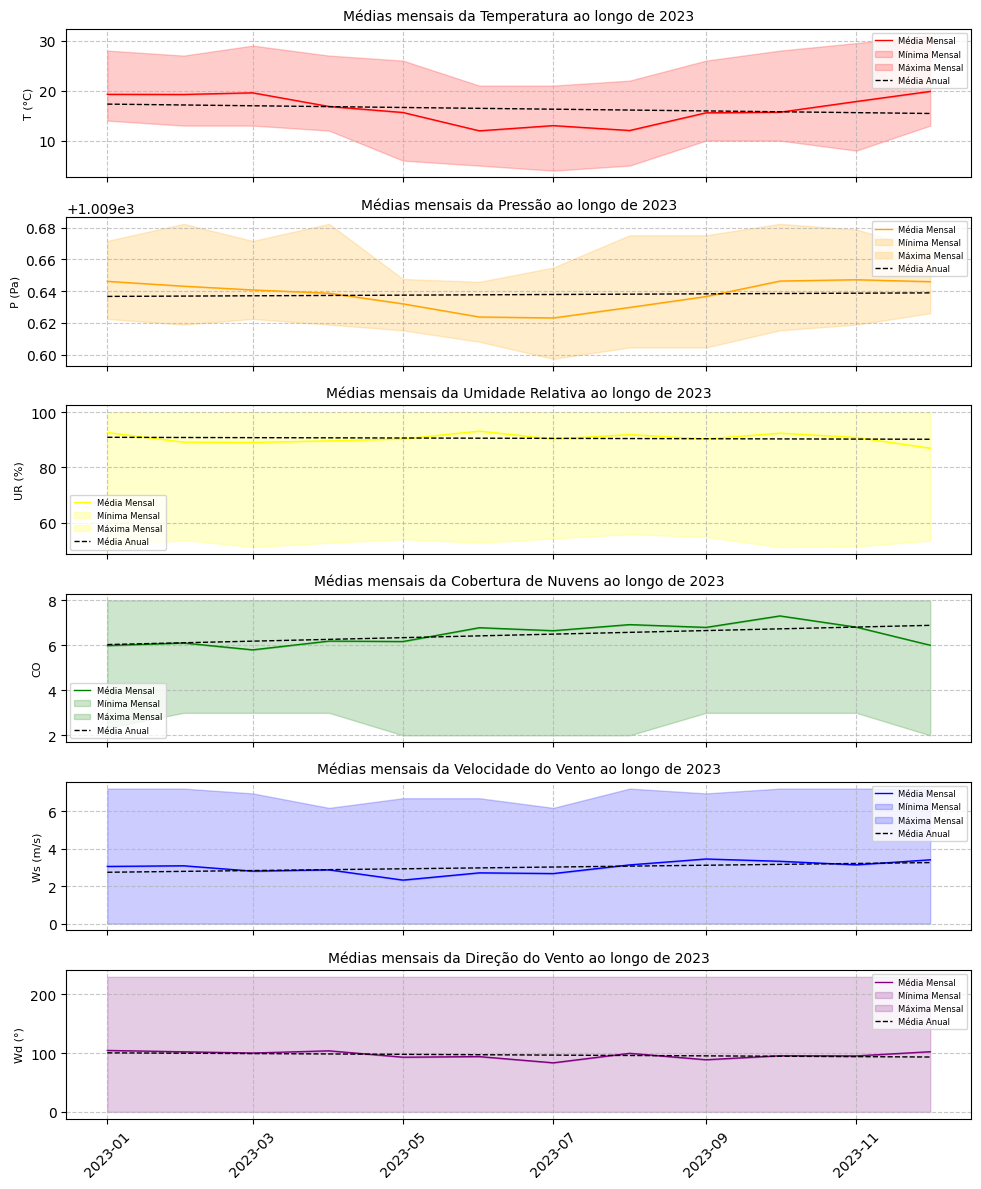

In [150]:
# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Lista de variáveis e cores correspondentes
variaveis_cores = [('temp', 'red'), ('p', 'orange'), ('relh', 'yellow'), ('cco', 'green'), ('ws', 'blue'), ('wd', 'purple')]

# Lista dos nomes para os eixos y
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CO', 'Ws (m/s)', 'Wd (°)']

# Lista dos nomes completos dos parâmetros
nomes_completos = ['Temperatura', 'Pressão', 'Umidade Relativa', 'Cobertura de Nuvens', 'Velocidade do Vento', 'Direção do Vento']

# Plotando cada variável
for i, (variavel, cor) in enumerate(variaveis_cores):
    ax[i].plot(media_mensal.index, media_mensal[variavel], color=cor, label='Média Mensal', linewidth=1)
    ax[i].fill_between(media_mensal.index, min_mensal[variavel], media_mensal[variavel], color=cor, alpha=0.2, label='Mínima Mensal')
    ax[i].fill_between(media_mensal.index, media_mensal[variavel], max_mensal[variavel], color=cor, alpha=0.2, label='Máxima Mensal')
    
    # Adicionando a média anual
    z = np.polyfit(media_mensal.index.to_julian_date(), media_mensal[variavel], 1)
    p = np.poly1d(z)
    ax[i].plot(media_mensal.index, p(media_mensal.index.to_julian_date()), color='black', linestyle='--', label='Média Anual', linewidth=1)
    
    ax[i].set_ylabel(nomes_eixos_y[i], fontsize=8)  # Usando os nomes da lista para os eixos y
    ax[i].legend(fontsize=6)
    ax[i].grid(True, linestyle='--', alpha=0.7)
    
    # Adicionando o título ao gráfico
    titulo = f'Médias mensais da {nomes_completos[i]} ao longo de 2023'
    ax[i].set_title(titulo, fontsize=10)

# Rotacionar os rótulos do eixo x
ax[-1].tick_params(axis='x', rotation=45)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

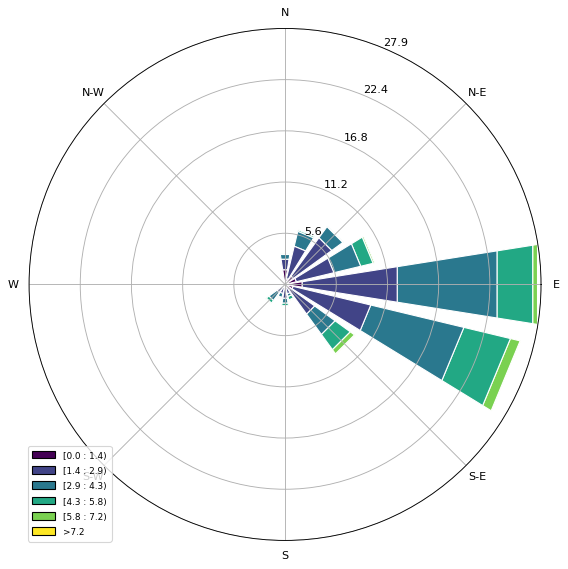

In [103]:
# Criando minha rosa dos ventos para avaliar a direção do vento
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

## Análise dos resultados da Etapa 1 da Atividade 2

xxxxxxxxxxxxx

# Etapa 2
Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

## Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [81]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para gerar datas aleatórias em um intervalo de dias
def random_dates(start_date, end_date, n):
    delta = end_date - start_date
    return [start_date + timedelta(days=random.randint(0, delta.days)) for _ in range(n)]

# Definindo intervalos para verão e inverno
# Verão no Hemisfério Sul (21 de dezembro a 20 de março)
summer_start = datetime(2023, 12, 21)
summer_end = datetime(2024, 3, 20)

# Inverno no Hemisfério Sul (21 de junho a 20 de setembro)
winter_start = datetime(2023, 6, 21)
winter_end = datetime(2023, 9, 20)

# Gerando 5 datas aleatórias para verão e inverno
summer_dates = random_dates(summer_start, summer_end, 5)
winter_dates = random_dates(winter_start, winter_end, 5)

# Estação de análise
station = 'SBFL'

# Função para extrair dados para uma lista de datas
def extract_data(dates, times, station):
    data = {}
    for date in dates:
        for time in times:
            datetime_obj = datetime(date.year, date.month, date.day, time)
            attempt_date = datetime_obj
            df = None
            # Tentar até encontrar dados para a data próxima disponível
            while df is None:
                try:
                    df = WyomingUpperAir.request_data(attempt_date, station)
                    data[attempt_date] = df
                except Exception as e:
                    print(f"Falha ao obter dados para {attempt_date}: {e}")
                    # Avança um dia para a próxima tentativa
                    attempt_date += timedelta(days=1)
    return data

# Horários de interesse (00h e 12h)
times = [0, 12]

# Extraindo dados
summer_data = extract_data(summer_dates, times, station)
winter_data = extract_data(winter_dates, times, station)

print(summer_data)
print(winter_data)

Falha ao obter dados para 2024-01-21 00:00:00: list index out of range
Falha ao obter dados para 2024-01-22 00:00:00: list index out of range
Falha ao obter dados para 2024-01-21 12:00:00: list index out of range
Falha ao obter dados para 2024-02-11 12:00:00: No data available for 2024-02-11 12Z for station SBFL.
{datetime.datetime(2024, 1, 23, 0, 0):     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1019.0      5.0         20.0      18.8        230      6   4.596267   
1     1000.0    166.0         19.8      18.1        205     10   4.226183   
2      980.0    340.0         19.4      17.3        175     11  -0.958713   
3      942.0    679.0         17.2      16.1        115     12 -10.875693   
4      925.0    835.0         16.2      15.5        110     14 -13.155697   
..       ...      ...          ...       ...        ...    ...        ...   
83      25.0  25066.0        -54.4     -87.5        105     35 -33.807404   
84      24.0  25328.0        -


Analisando dados para 2024-01-23 00:00:00 (Verão)

Inversões de temperatura em 2024-01-23 00:00:00: [(3324.0, 3.2), (3384.0, 3.6), (6537.0, -16.9), (9241.0, -34.1), (9308.0, -33.5), (13562.0, -60.9), (13717.0, -59.5), (17325.0, -70.7), (18247.0, -66.3), (18971.0, -69.5), (19467.0, -66.3), (19935.0, -68.9)]


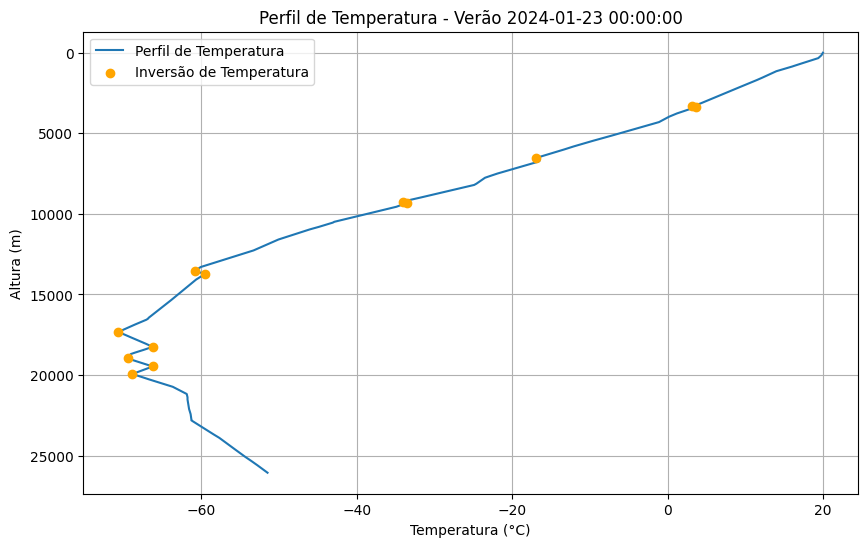

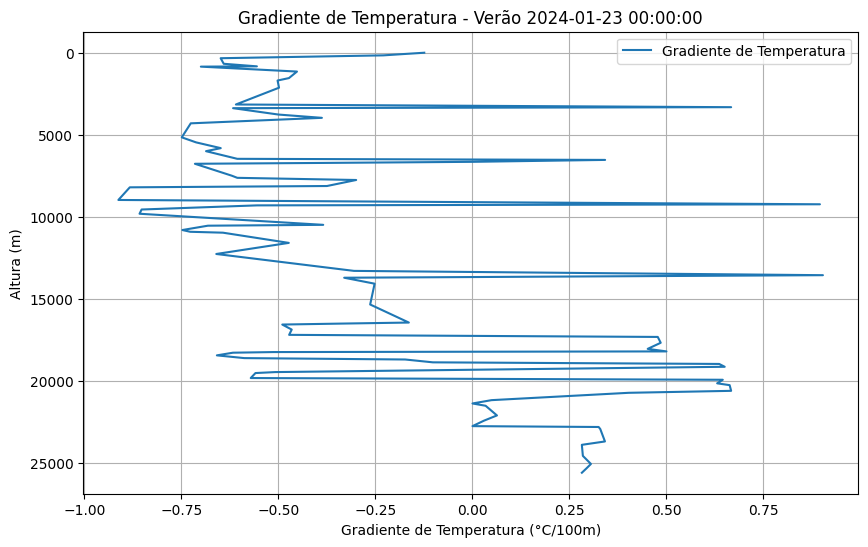


Analisando dados para 2024-01-22 12:00:00 (Verão)

Inversões de temperatura em 2024-01-22 12:00:00: [(3958, -0.9), (16343, -68.1), (16641, -65.1), (17796, -73.1), (18988, -68.7), (20455, -62.3), (20720, -63.9), (21372, -60.1), (22043, -61.5), (22889, -56.9), (24732, -54.9), (25806, -56.7)]


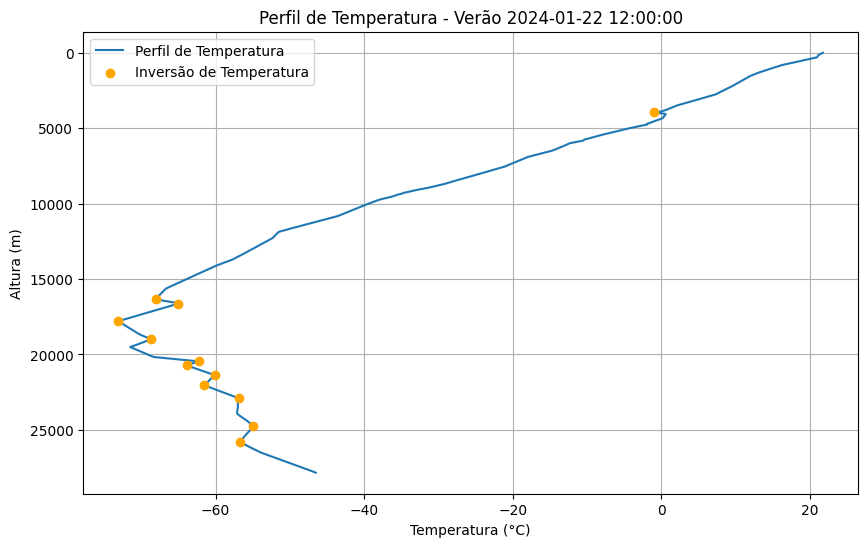

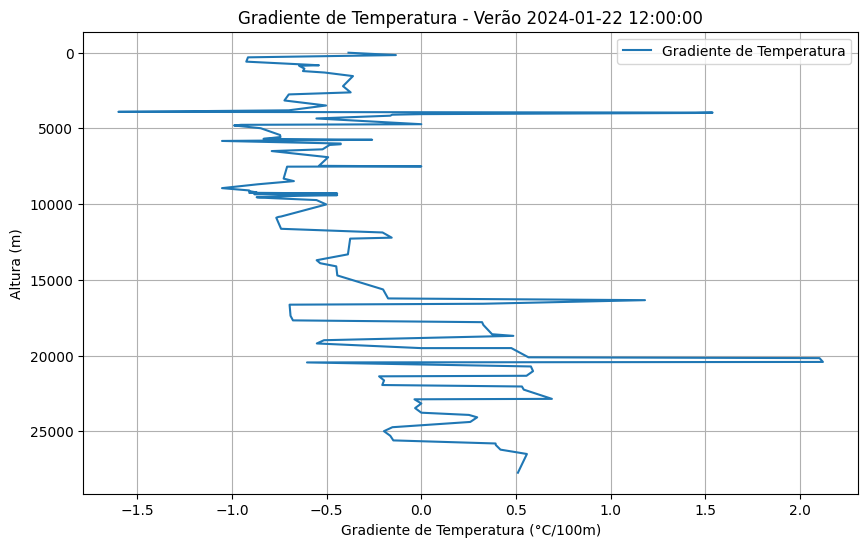


Analisando dados para 2024-03-17 00:00:00 (Verão)

Inversões de temperatura em 2024-03-17 00:00:00: [(161.0, 25.2), (5074.0, -0.3), (5132.0, 0.6), (16683.0, -78.9), (16740.0, -78.5), (17508.0, -82.5), (17997.0, -82.1), (18110.0, -82.5), (18557.0, -76.1), (18968.0, -77.5)]


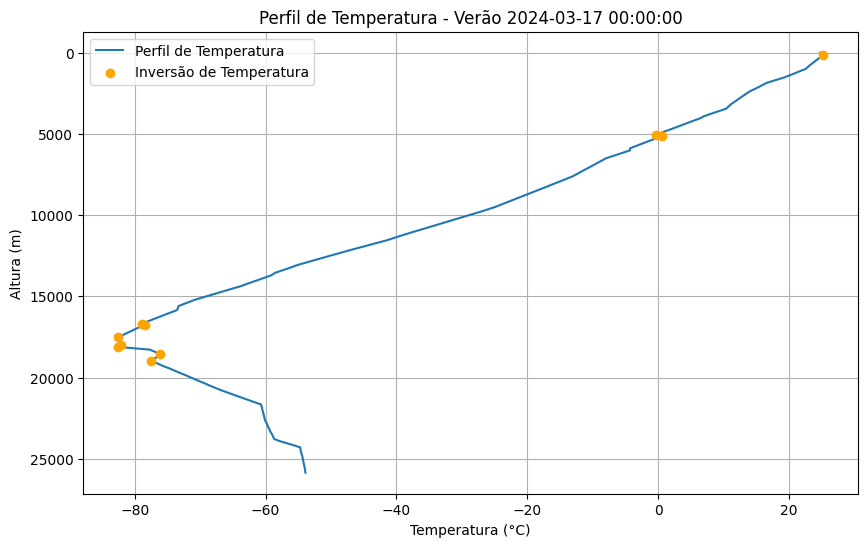

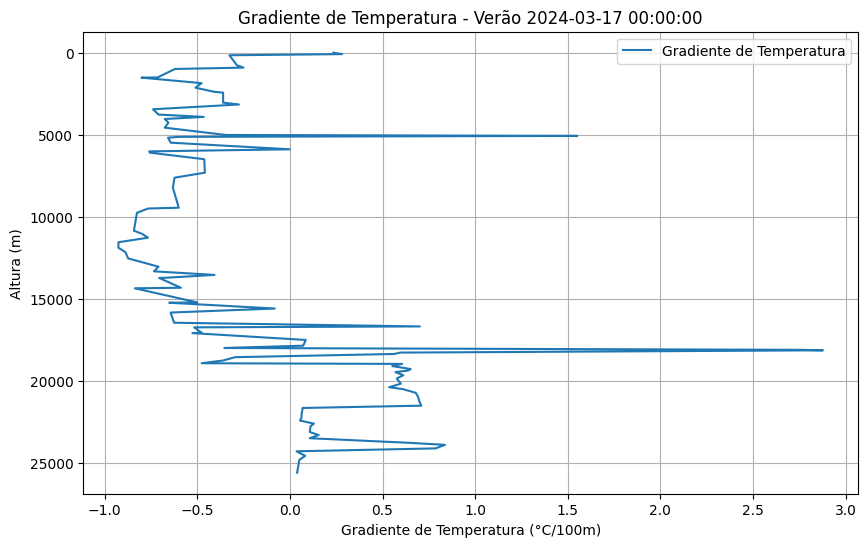


Analisando dados para 2024-03-17 12:00:00 (Verão)

Inversões de temperatura em 2024-03-17 12:00:00: [(3992, 5.0), (4163, 5.2), (4974, -0.7), (5148, 1.2), (17170, -81.9), (17764, -80.3), (18103, -82.9), (18610, -75.7), (18940, -77.7), (22743, -58.3), (22974, -59.3), (26957, -47.9)]


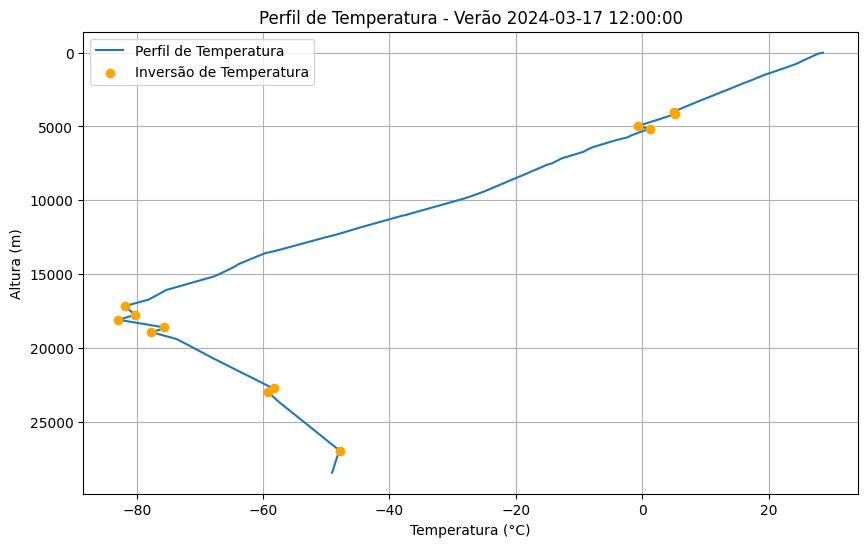

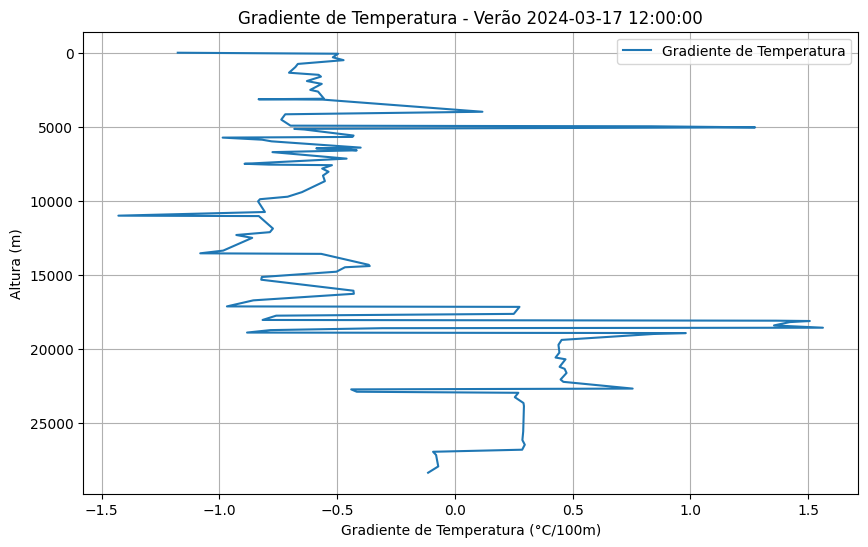


Analisando dados para 2024-02-11 00:00:00 (Verão)

Inversões de temperatura em 2024-02-11 00:00:00: [(1816, 15.4), (2122, 17.8), (5464, -2.7), (5494, -1.7), (15137, -72.3), (15274, -70.5), (16422, -79.1), (17800, -74.5), (18162, -76.5), (21103, -67.1), (24577, -55.7), (24840, -57.7), (27958, -47.7)]


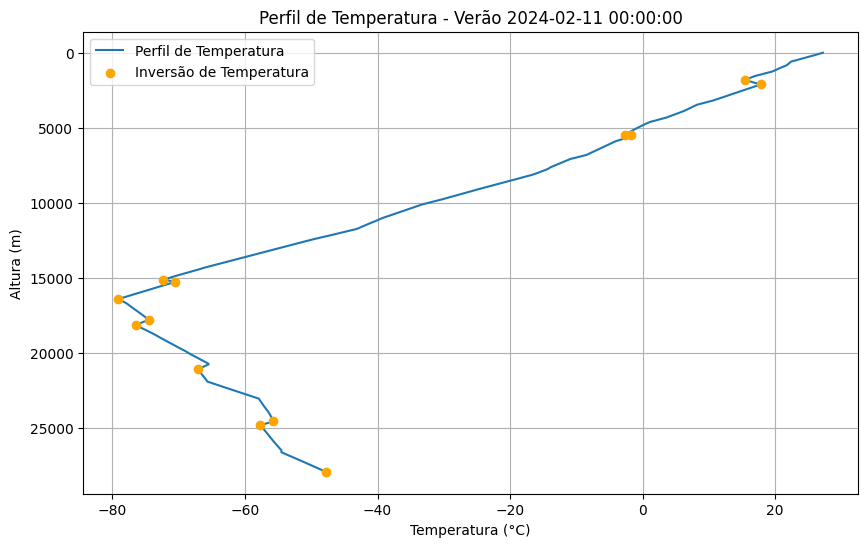

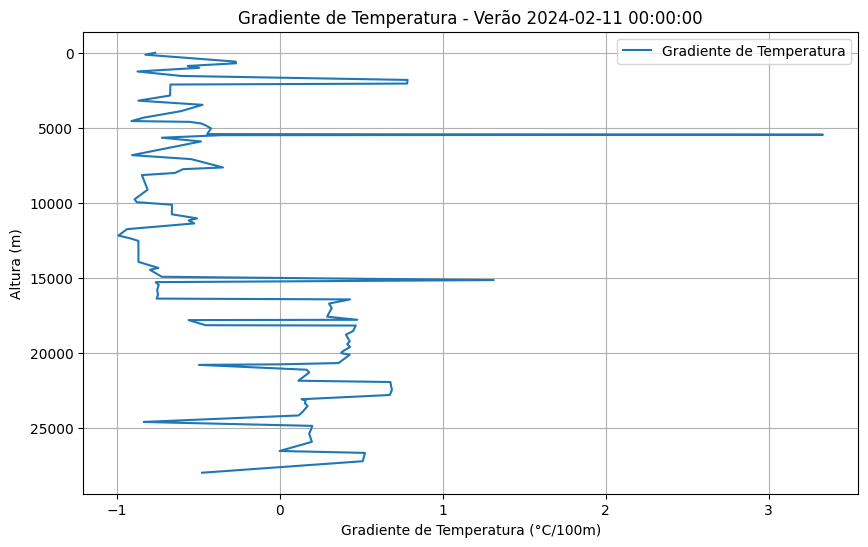


Analisando dados para 2024-02-12 12:00:00 (Verão)

Inversões de temperatura em 2024-02-12 12:00:00: [(978.0, 21.8), (1085.0, 24.2), (1972.0, 18.6), (2079.0, 18.8), (5213.0, 0.0), (5376.0, 0.2), (18628.0, -78.3), (20818.0, -69.3), (21088.0, -70.3), (24430.0, -56.9), (24760.0, -57.5), (27658.0, -43.5), (28925.0, -46.1)]


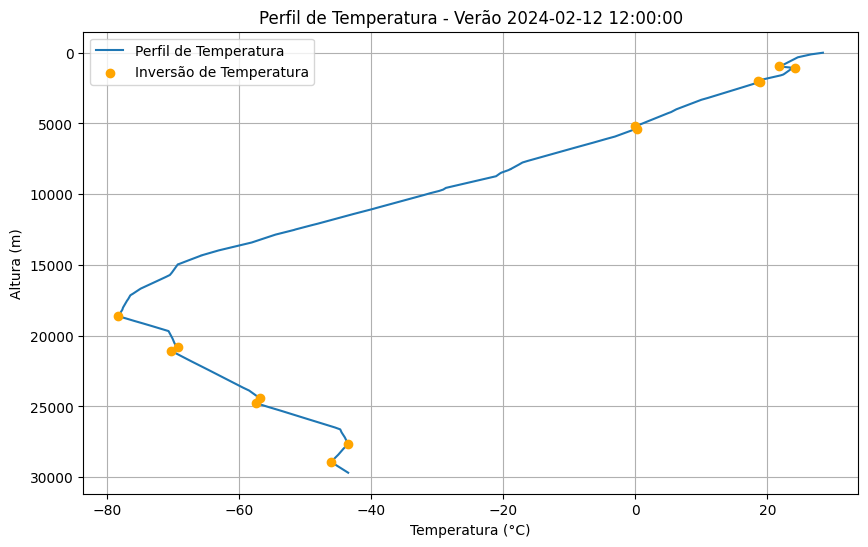

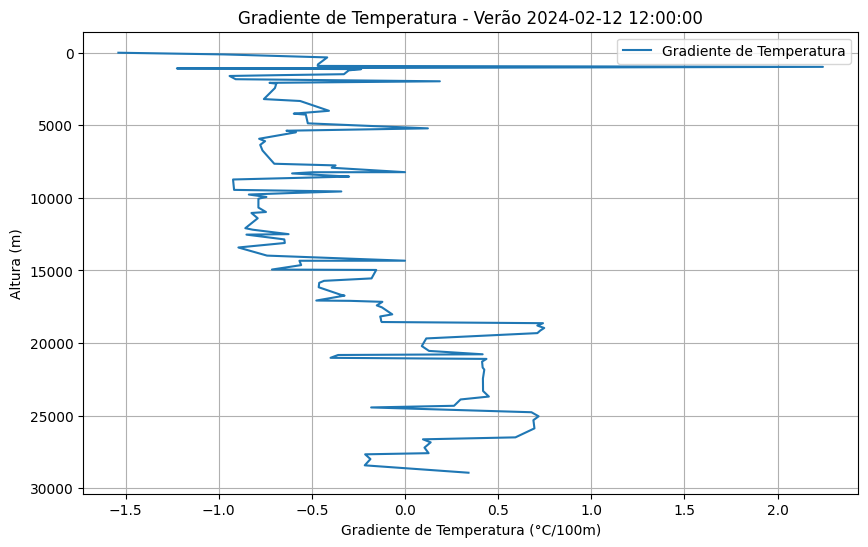


Analisando dados para 2024-02-23 00:00:00 (Verão)

Inversões de temperatura em 2024-02-23 00:00:00: [(4972.0, -3.1), (5101.0, -1.9), (18391.0, -73.3)]


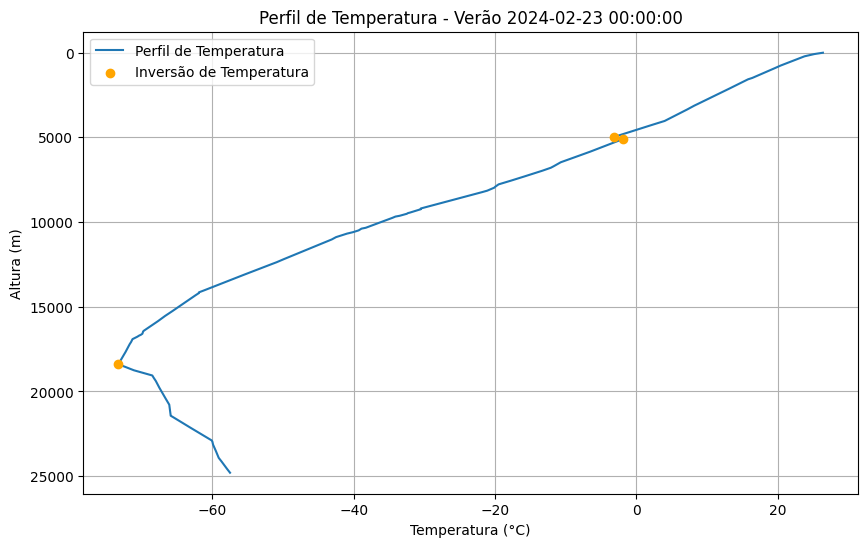

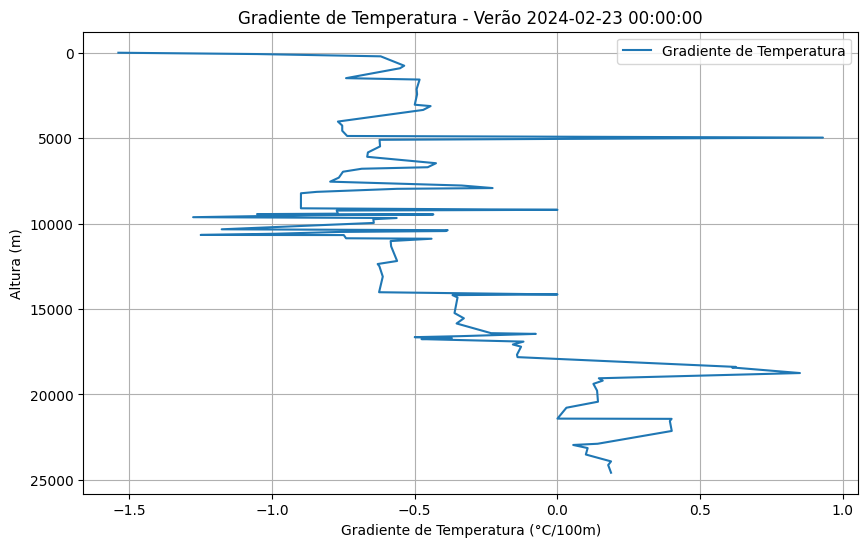


Analisando dados para 2024-02-23 12:00:00 (Verão)

Inversões de temperatura em 2024-02-23 12:00:00: [(1016, 22.0), (1162, 22.2), (3773, 5.0), (3811, 5.4), (4960, -2.7), (5161, -2.1), (17190, -74.7), (23694, -57.9), (23880, -58.3)]


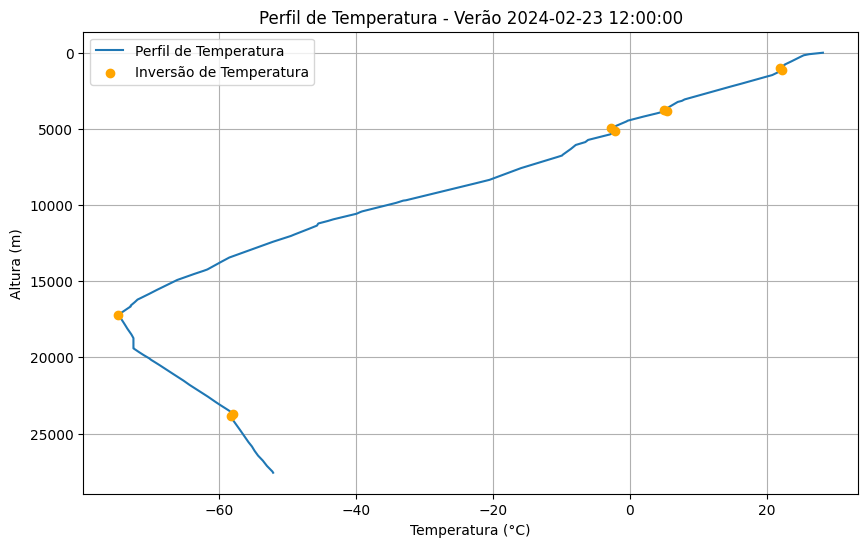

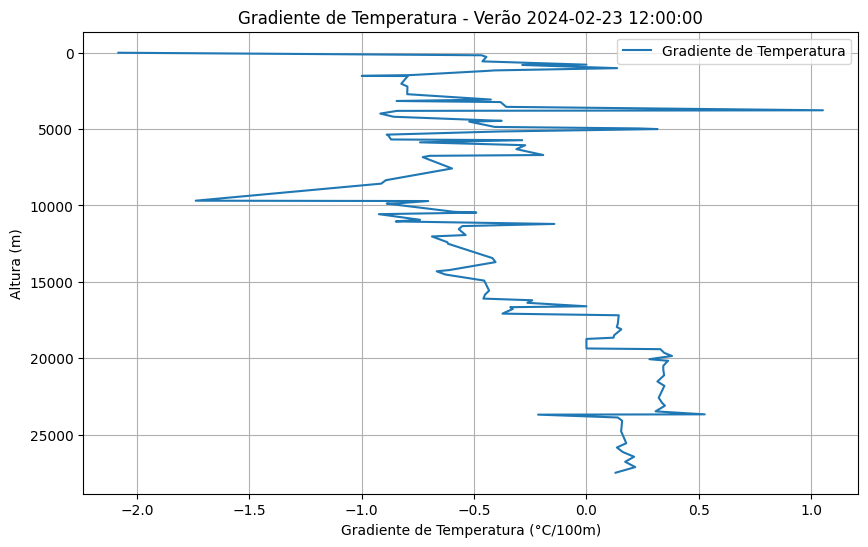


Analisando dados para 2024-01-16 00:00:00 (Verão)

Inversões de temperatura em 2024-01-16 00:00:00: [(103, 26.2), (165, 26.8), (4451, 1.2), (4628, 1.6), (5326, -2.9), (5400, -2.7), (15460, -73.3), (16621, -71.1), (17838, -79.9), (18326, -75.5), (19209, -69.7), (20125, -70.9), (20730, -67.7), (21113, -68.9), (21910, -65.9), (23344, -56.3), (23870, -56.5)]


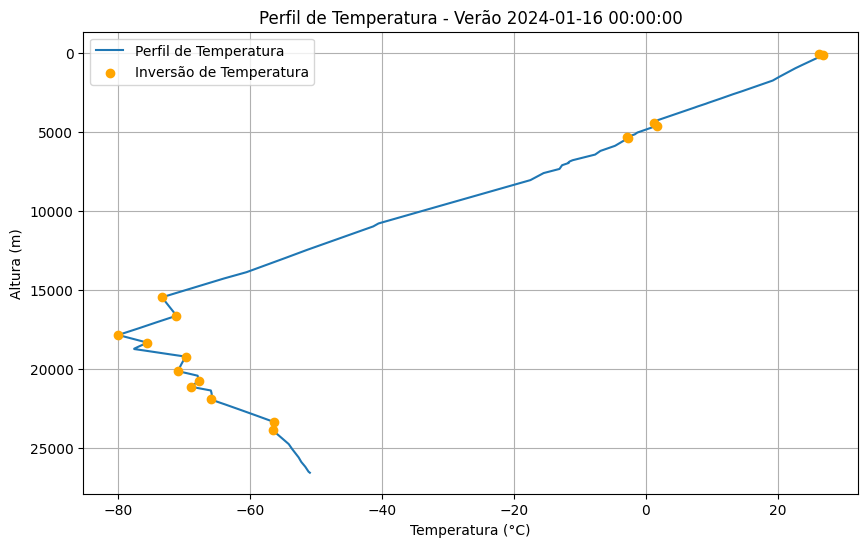

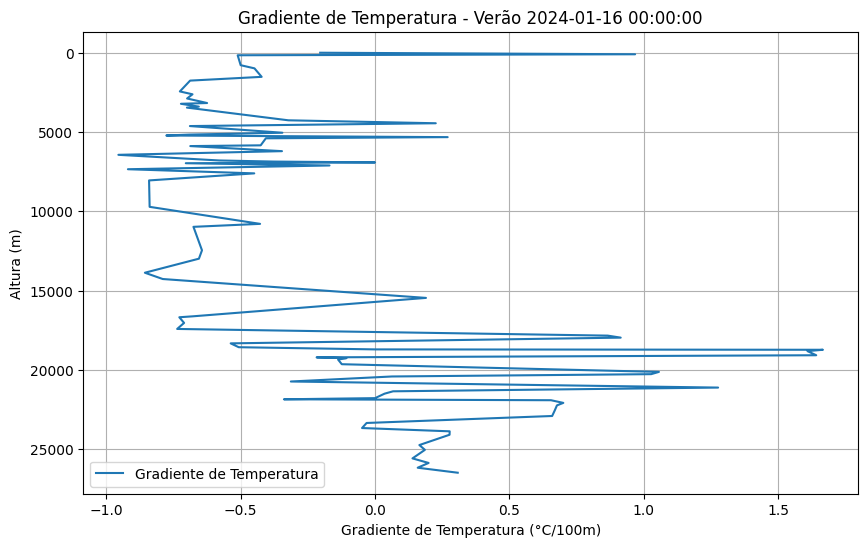


Analisando dados para 2024-01-16 12:00:00 (Verão)

Inversões de temperatura em 2024-01-16 12:00:00: [(771, 21.6), (932, 22.6), (3309, 9.8), (3406, 11.0), (5076, 0.4), (5178, 1.4), (15277, -72.5), (16515, -70.5), (17700, -81.3), (18796, -75.7), (19078, -76.9), (19984, -69.9), (20320, -70.5), (24133, -54.9), (24522, -56.9)]


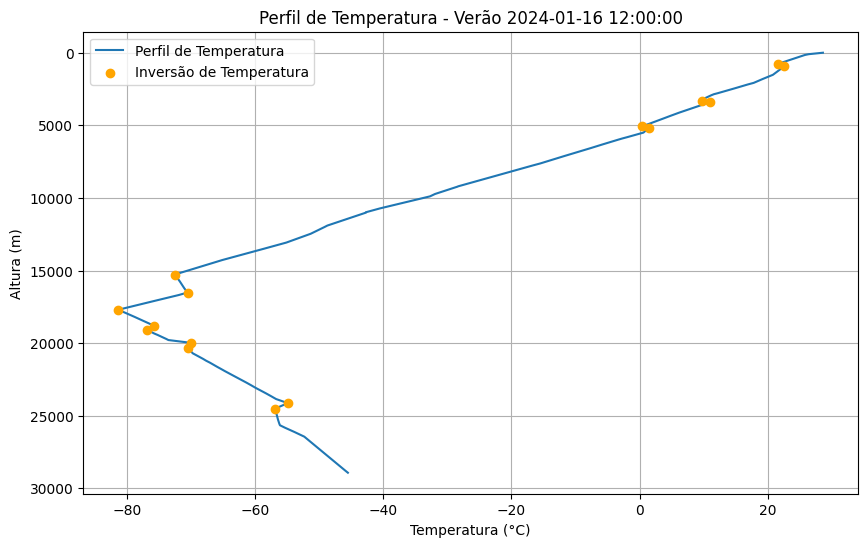

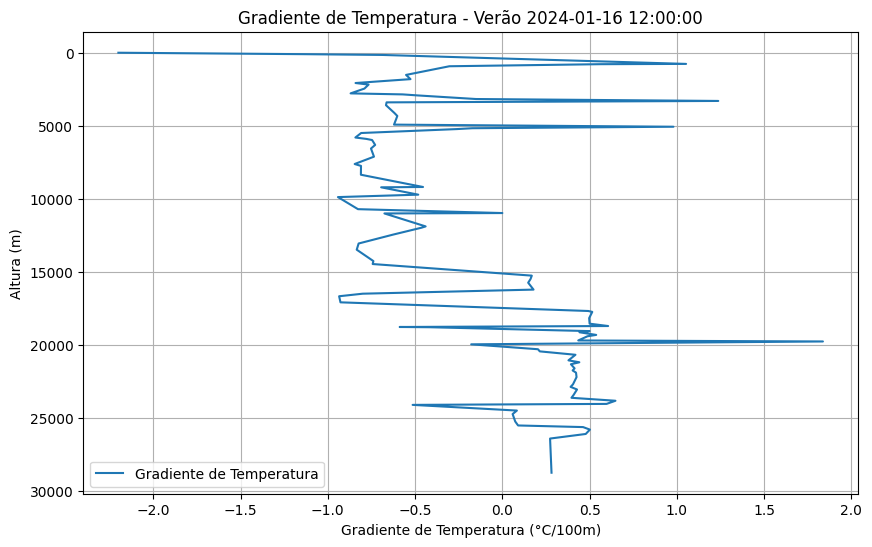


Analisando dados para 2023-08-08 00:00:00 (Inverno)

Inversões de temperatura em 2023-08-08 00:00:00: [(475, 13.8), (796, 15.4), (10264, -42.3), (10416, -41.5), (10810, -43.3), (11112, -42.5), (15025, -68.1), (15215, -66.7)]


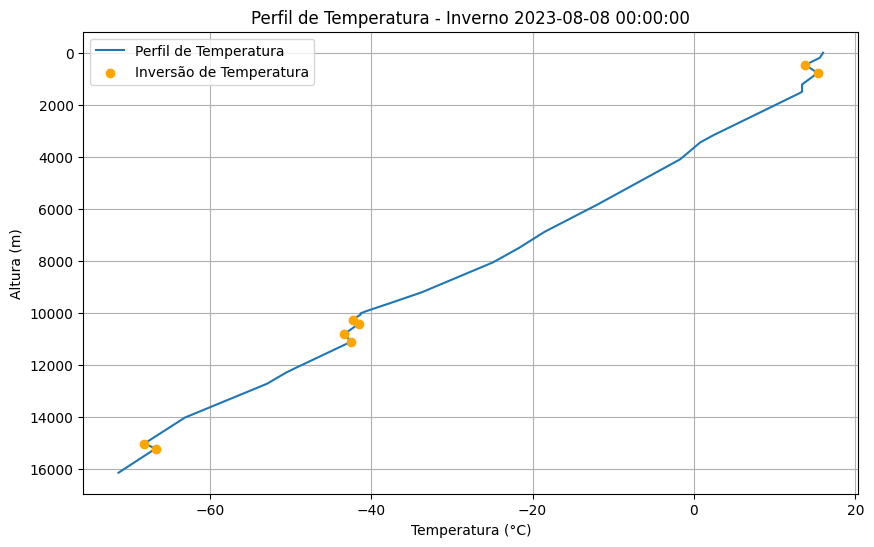

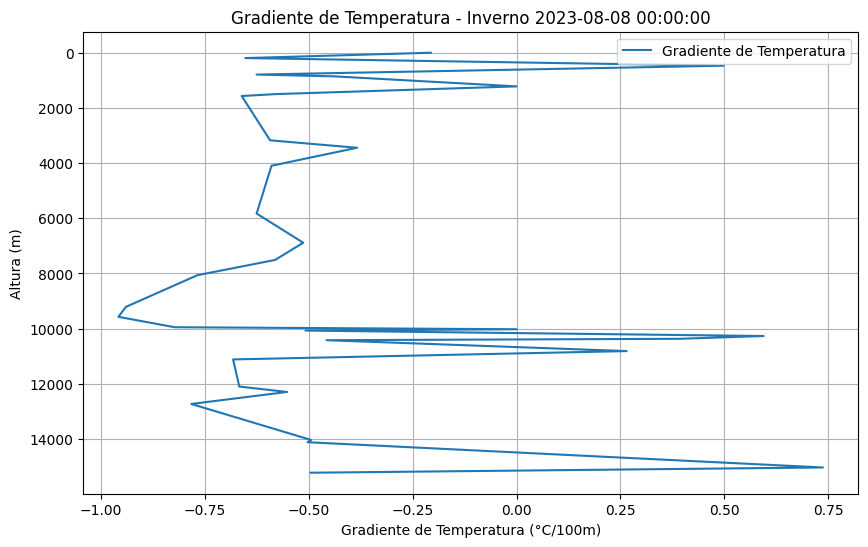


Analisando dados para 2023-08-08 12:00:00 (Inverno)

Inversões de temperatura em 2023-08-08 12:00:00: [(1759, 4.8), (1959, 7.2), (3007, 1.6), (3379, 5.2), (7283, -23.3), (7373, -22.5), (9403, -37.7), (9449, -37.3), (10356, -43.9), (10407, -43.1), (14653, -64.9), (15267, -63.9), (16460, -68.7), (16520, -68.5), (16857, -69.7), (17734, -66.5), (18608, -69.9), (19861, -61.3), (20554, -64.5)]


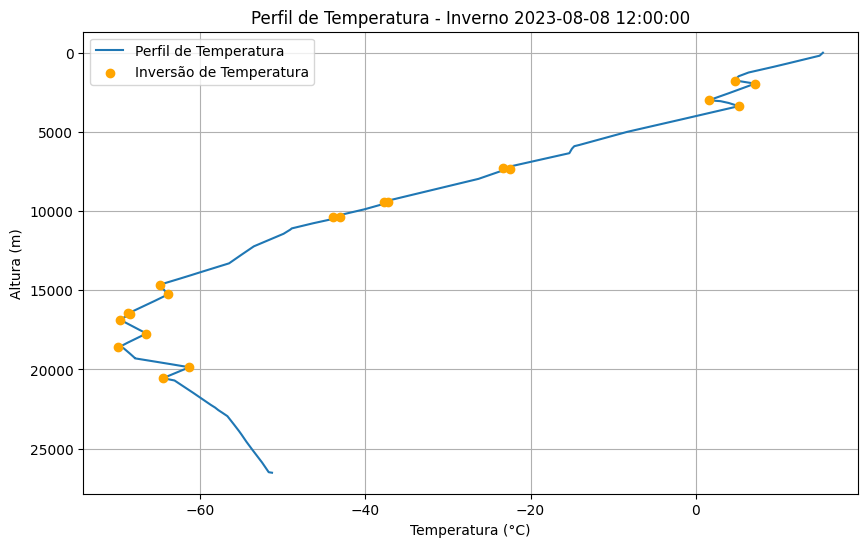

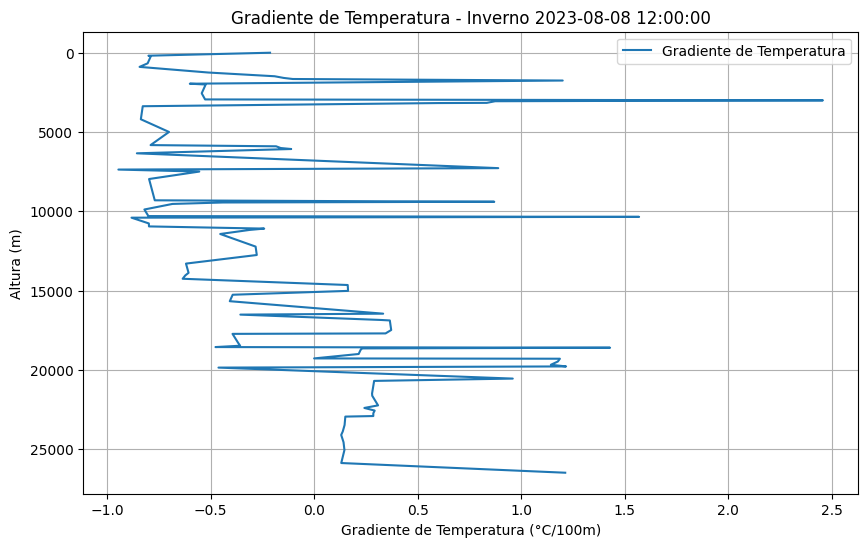


Analisando dados para 2023-07-18 00:00:00 (Inverno)

Inversões de temperatura em 2023-07-18 00:00:00: [(1163, 7.2), (1437, 8.0), (4004, -3.5), (4132, -2.5), (13017, -62.9), (13382, -62.7), (17235, -66.9), (17687, -63.3), (18505, -66.1), (19072, -60.9), (19584, -62.9), (20395, -57.5), (20756, -60.3)]


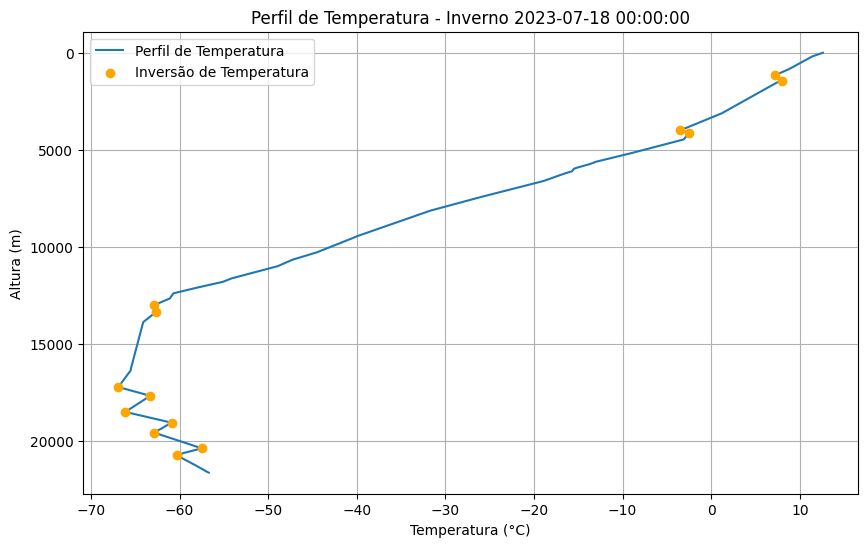

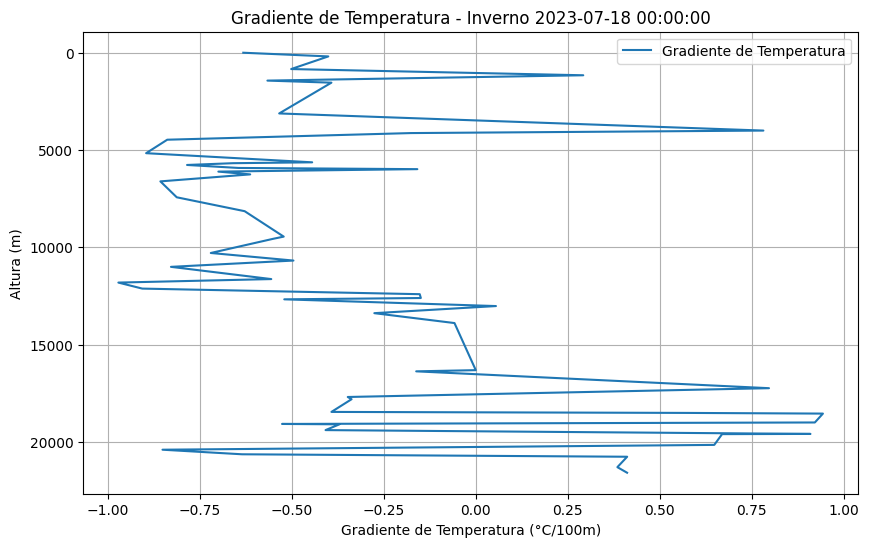


Analisando dados para 2023-07-18 12:00:00 (Inverno)

Inversões de temperatura em 2023-07-18 12:00:00: [(1152, 3.4), (1575, 7.2), (3566, -3.3), (3749, -0.5), (12101, -62.5), (12689, -58.5), (14561, -62.7), (14944, -60.1), (15897, -64.7), (16309, -62.9), (18052, -60.7), (18949, -64.1), (19386, -60.7), (20000, -63.1)]


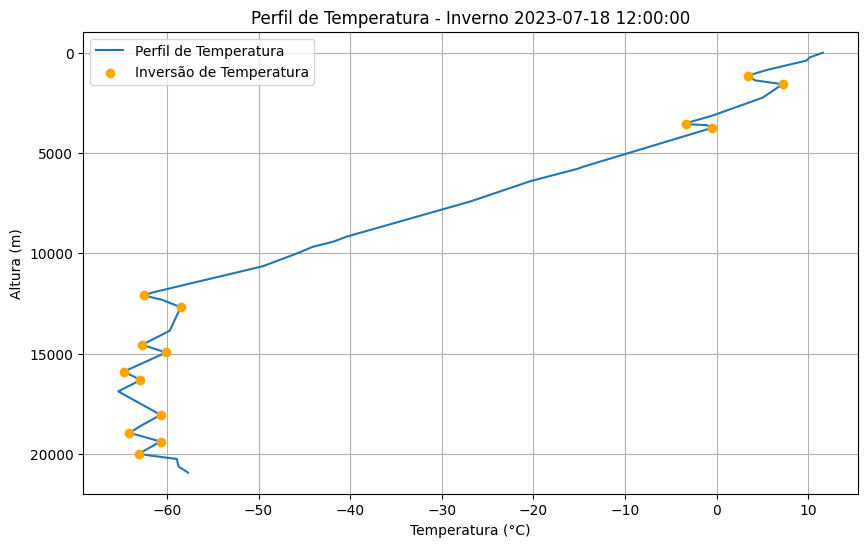

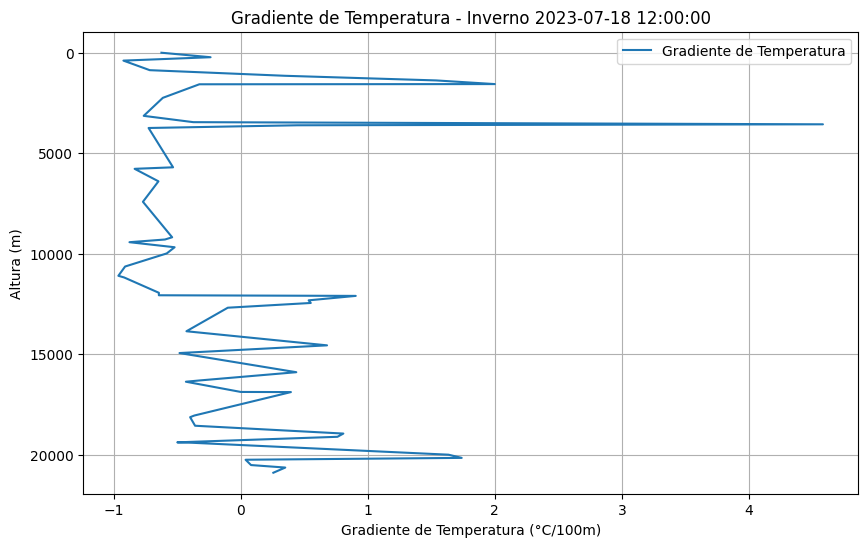


Analisando dados para 2023-09-18 00:00:00 (Inverno)

Inversões de temperatura em 2023-09-18 00:00:00: [(3304, 8.6), (3425, 9.4), (18690, -70.7), (19057, -71.5), (21514, -61.1), (23196, -55.9), (23742, -57.7), (24890, -50.7)]


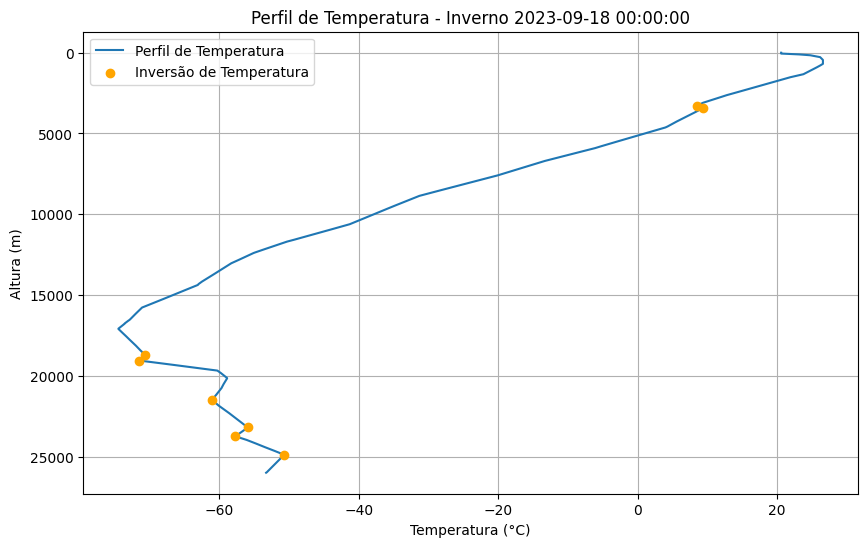

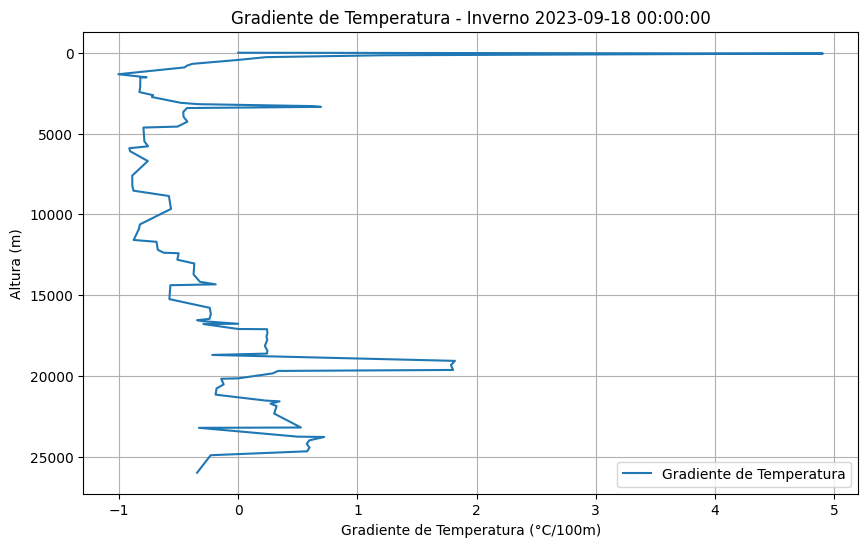


Analisando dados para 2023-09-18 12:00:00 (Inverno)

Inversões de temperatura em 2023-09-18 12:00:00: [(152, 18.2), (567, 27.6), (938, 27.2), (15697, -72.7), (16118, -71.1), (17597, -75.5), (18610, -63.3), (19870, -65.3)]


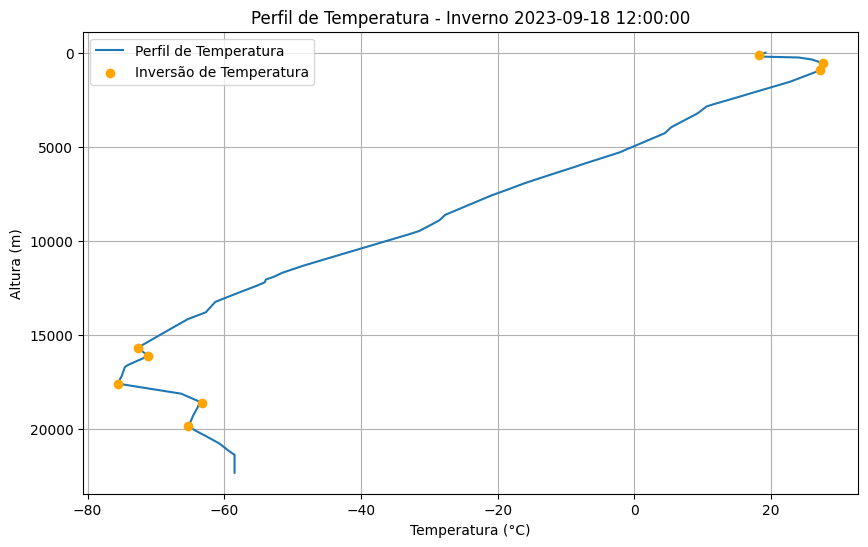

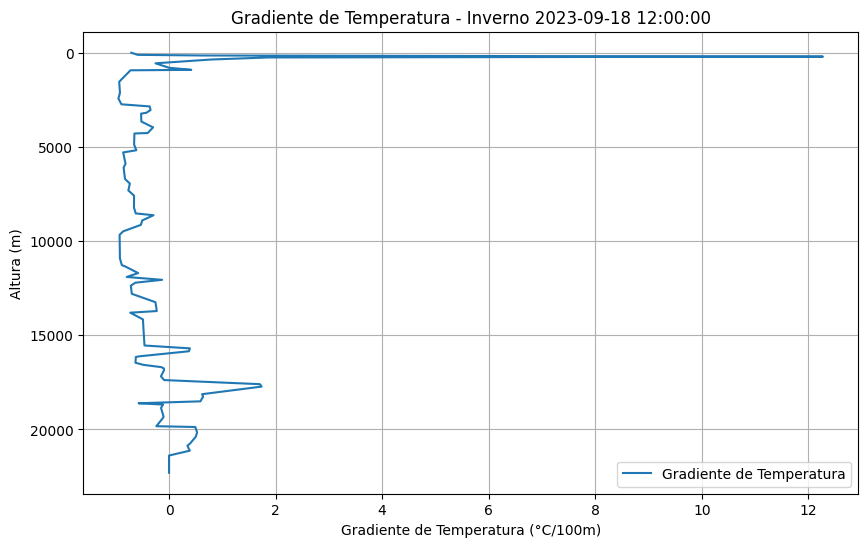


Analisando dados para 2023-09-02 00:00:00 (Inverno)

Inversões de temperatura em 2023-09-02 00:00:00: [(881, 12.2), (1019, 12.6), (1341, 11.8), (1812, 17.8), (13063, -62.7), (14009, -60.7), (15725, -70.3), (16510, -69.1), (17016, -72.3), (18613, -67.9), (18896, -63.3), (19129, -63.5), (20291, -55.3), (20682, -57.3)]


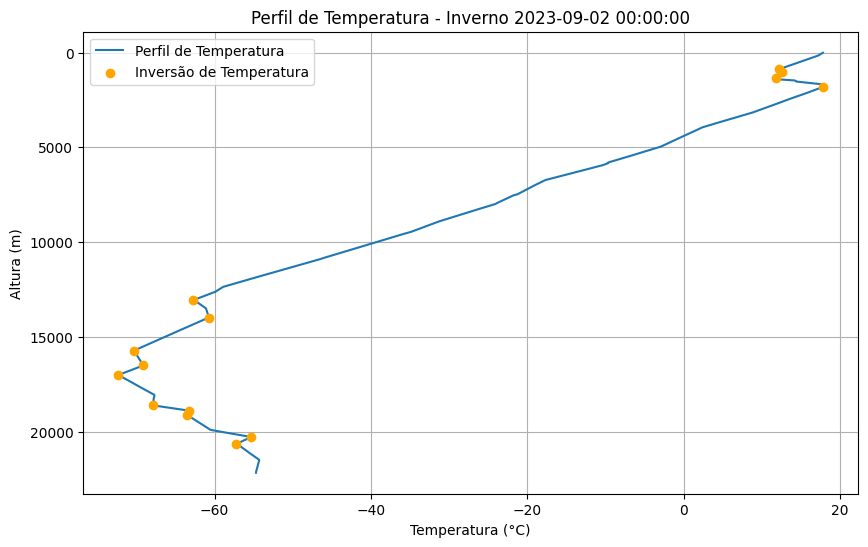

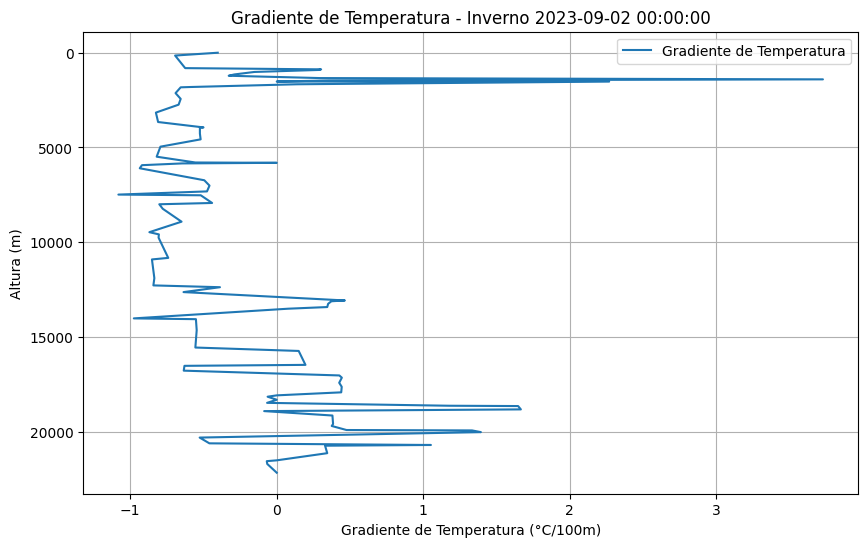


Analisando dados para 2023-09-02 12:00:00 (Inverno)

Inversões de temperatura em 2023-09-02 12:00:00: [(1489, 12.2), (1649, 14.4), (13962, -69.1), (14326, -64.1), (16821, -73.7), (17300, -69.9), (17743, -71.3), (20474, -57.3), (20620, -58.5)]


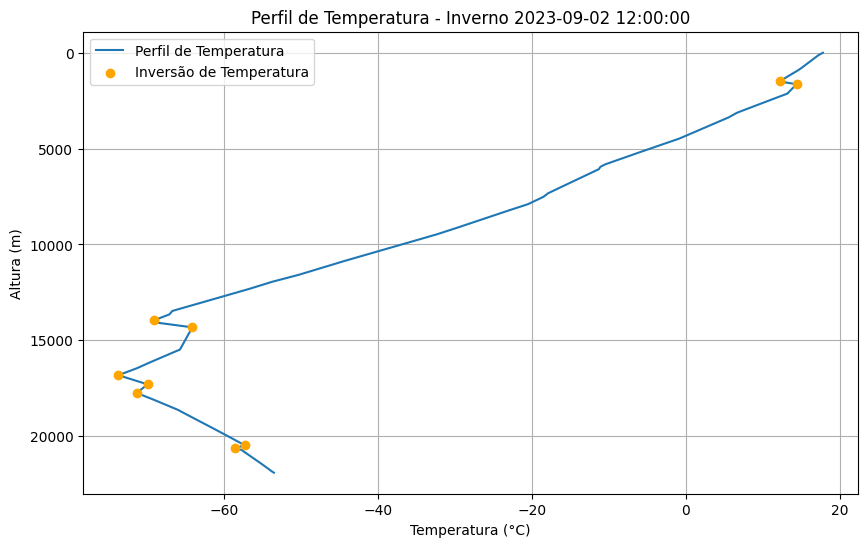

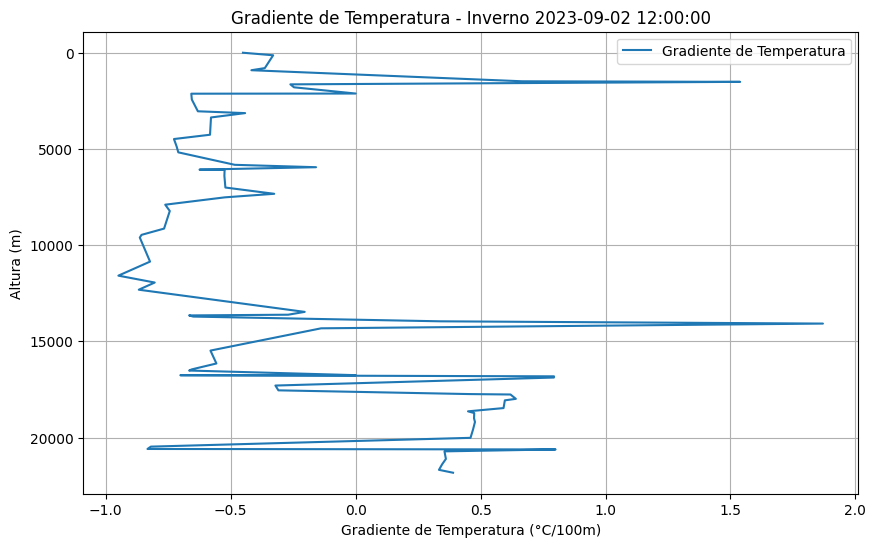


Analisando dados para 2023-08-21 00:00:00 (Inverno)

Inversões de temperatura em 2023-08-21 00:00:00: [(58, 20.0), (268, 18.2), (330, 19.8), (1155, 16.6), (1223, 17.2), (4262, -4.1), (9549, -46.7), (9663, -45.3), (10834, -52.5), (11733, -49.3), (14705, -61.5), (15098, -58.7), (16437, -68.3), (16937, -63.3), (18053, -69.1), (19492, -56.5), (20324, -62.1), (22495, -55.3)]


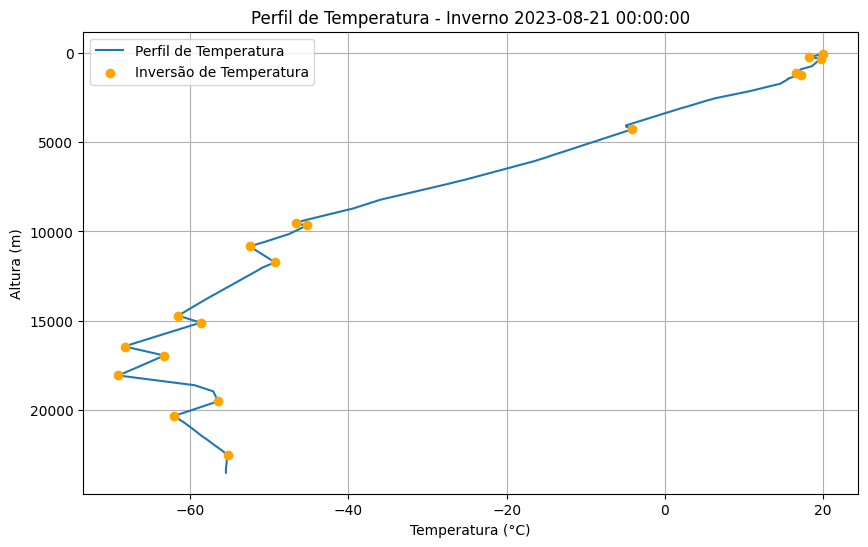

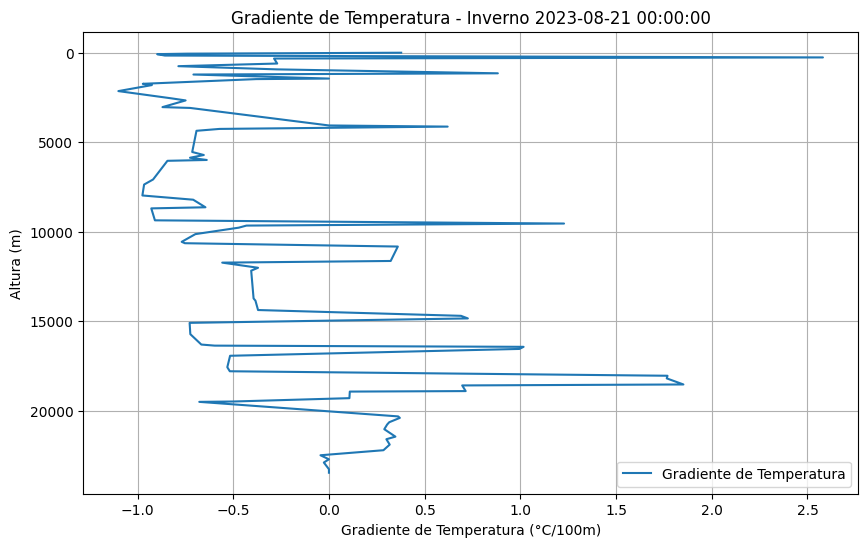


Analisando dados para 2023-08-21 12:00:00 (Inverno)

Inversões de temperatura em 2023-08-21 12:00:00: [(208.0, 16.4), (481.0, 19.4), (4441.0, -5.3), (4521.0, -4.9), (10990.0, -51.9), (11631.0, -50.7), (14725.0, -59.1), (14871.0, -57.9), (16589.0, -69.5), (17300.0, -65.1), (17934.0, -68.7), (18655.0, -60.3), (19422.0, -63.7), (21951.0, -56.7), (22554.0, -59.5)]


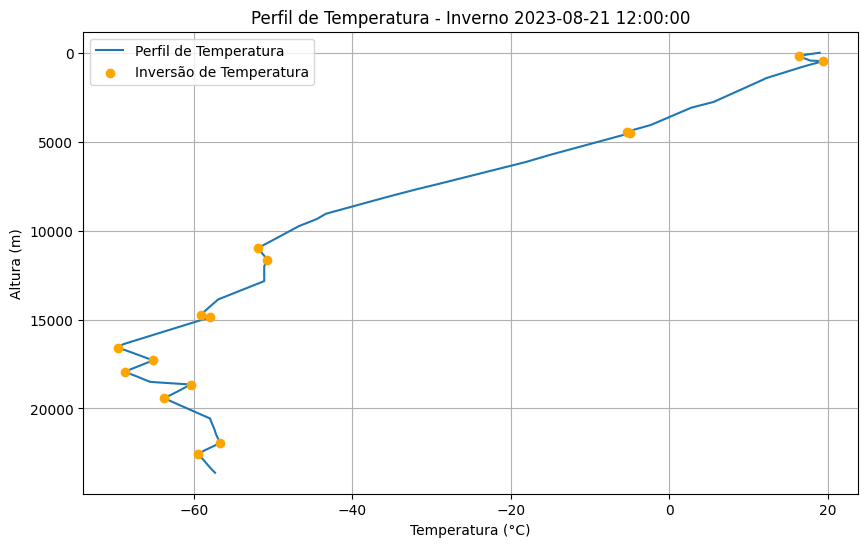

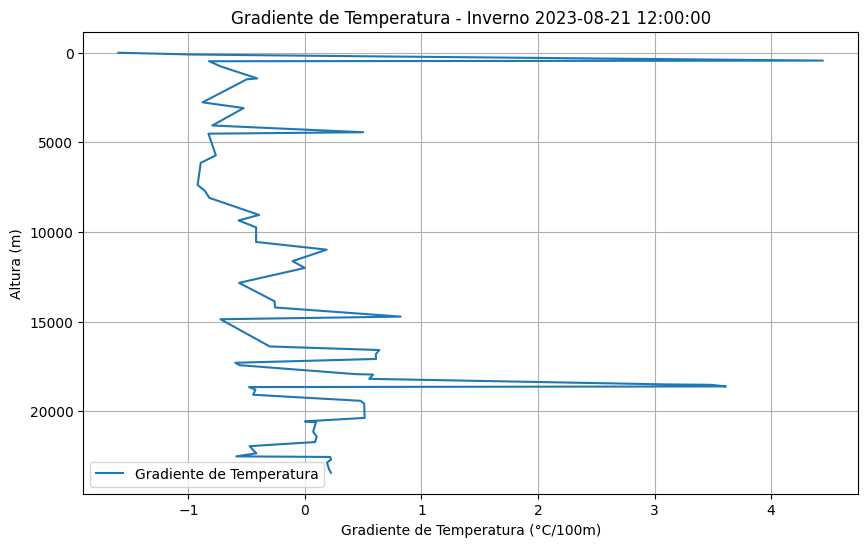

In [82]:
# Função para identificar os pontos de inversão de temperatura
def identify_inversions(df):
    temp = df['temperature'].values
    alt = df['height'].values
    pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
    
    inversions = [(alt[i], temp[i]) for i in pontos_inversao if 
                  (temp[i] > temp[i - 1] and temp[i] > temp[i + 1]) or 
                  (temp[i] < temp[i - 1] and temp[i] < temp[i + 1])]
    
    return inversions

# Função para plotar o perfil de temperatura
def plot_temperature_profile(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['temperature'], df['height'], label='Perfil de Temperatura')
    inversions = identify_inversions(df)
    label_added = False
    for inversion in inversions:
        if not label_added:
            plt.scatter(inversion[1], inversion[0], color='orange', label='Inversão de Temperatura', zorder=5)
            label_added = True
        else:
            plt.scatter(inversion[1], inversion[0], color='orange', zorder=5)
    plt.gca().invert_yaxis()
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar o gradiente de temperatura
def plot_temperature_gradient(df, title):
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])
    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
    plt.figure(figsize=(10, 6))
    plt.plot(dTdZ, df['height'][:-1], label='Gradiente de Temperatura')
    plt.gca().invert_yaxis()
    plt.xlabel('Gradiente de Temperatura (°C/100m)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Analisando e plotando os dados de verão
for datetime_obj, df in summer_data.items():
    print(f"\nAnalisando dados para {datetime_obj} (Verão)\n")
    inversions = identify_inversions(df)
    print(f"Inversões de temperatura em {datetime_obj}: {inversions}")
    plot_temperature_profile(df, f"Perfil de Temperatura - Verão {datetime_obj}")
    plot_temperature_gradient(df, f"Gradiente de Temperatura - Verão {datetime_obj}")

# Analisando e plotando os dados de inverno
for datetime_obj, df in winter_data.items():
    print(f"\nAnalisando dados para {datetime_obj} (Inverno)\n")
    inversions = identify_inversions(df)
    print(f"Inversões de temperatura em {datetime_obj}: {inversions}")
    plot_temperature_profile(df, f"Perfil de Temperatura - Inverno {datetime_obj}")
    plot_temperature_gradient(df, f"Gradiente de Temperatura - Inverno {datetime_obj}")

In [45]:
# Função para calcular a altura da camada limite
def calculate_boundary_layer_height(df):
    inversions = identify_inversions(df)
    if inversions:
        return inversions[0][0]
    return None

# Calculando a altura da camada limite para cada data
boundary_layer_heights_summer = {date: calculate_boundary_layer_height(df) for date, df in summer_data.items()}
boundary_layer_heights_winter = {date: calculate_boundary_layer_height(df) for date, df in winter_data.items()}

print("\nAlturas da camada limite no Verão:")
for date, height in boundary_layer_heights_summer.items():
    print(f"{date}: {height} m")

print("\nAlturas da camada limite no Inverno:")
for date, height in boundary_layer_heights_winter.items():
    print(f"{date}: {height} m")


Alturas da camada limite no Verão:
2024-03-18 00:00:00: 2093.0 m
2024-03-18 12:00:00: 1048 m
2024-02-16 00:00:00: 66 m
2024-02-16 12:00:00: 1832 m
2024-02-22 00:00:00: 2422 m
2024-02-22 12:00:00: 5378 m
2024-01-27 00:00:00: 58 m
2024-01-29 12:00:00: 1421 m
2024-02-06 00:00:00: 4390 m
2024-02-06 12:00:00: 13319 m

Alturas da camada limite no Inverno:
2023-08-24 00:00:00: 173.0 m
2023-08-24 12:00:00: 1221 m
2023-08-30 00:00:00: 2840 m
2023-08-30 12:00:00: 743.0 m
2023-08-06 00:00:00: 257.0 m
2023-08-06 12:00:00: 459 m
2023-07-21 00:00:00: 1658 m
2023-07-21 12:00:00: 1453.0 m
2023-09-06 00:00:00: 63.0 m
2023-09-06 12:00:00: 1679 m


## Análise dos resultados da Etapa 1 da Atividade 2

xxxxxxxxxxxxx

# Etapa 3

Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

## Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica. Os dados METEO são referentes à localização da Industria ArcelorMittal Vega, em São Francisco do Sul.

## Analisando os dados de altura da camada limite e turbulência através de gráficos de linha

Através dos dados extraídos do EZ-AERMET, analisar a altura da camada limite e a rugosidade

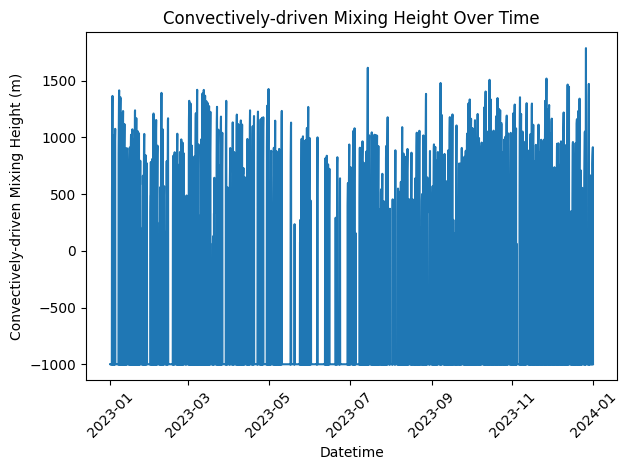

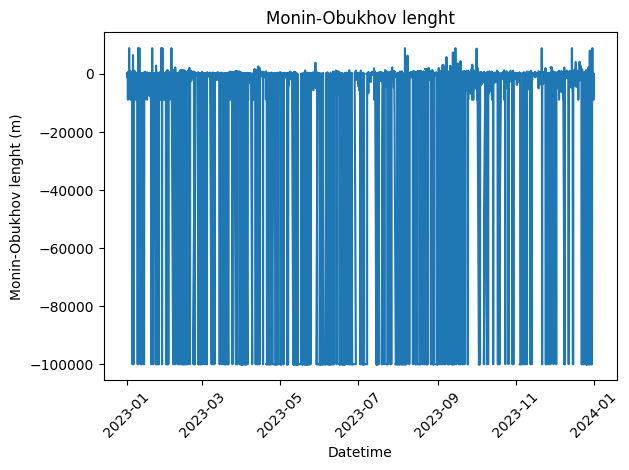

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
file_path = r'C:\Users\Dell\OneDrive\Documentos\GitHub\Polatm_RamonVieira\inputs\EZ_AERMOD_RamonVieira_2024-06-04\METEO.csv'

# Carregando a planilha base do arquivo CSV
df = pd.read_csv(file_path)

# Função para converter ano de dois dígitos para quatro dígitos
def convert_year(two_digit_year):
    return 2000 + two_digit_year

# Função para ajustar as horas
def adjust_hours(hour):
    if hour == 24:
        return 0
    return hour

# Aplicando a conversão do ano e criando a coluna datetime
df['datetime'] = pd.to_datetime(df.apply(lambda row: f"{convert_year(row['year'])}-{row['month']:02d}-{row['day']:02d} {adjust_hours(row['hour']):02d}:00", axis=1))

# Plotando a coluna "mixing_height" em relação à coluna datetime
plt.plot(df['datetime'], df['mixing_height'])
plt.xlabel('Datetime')
plt.ylabel('Convectively-driven Mixing Height (m)')
plt.title('Convectively-driven Mixing Height Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando a coluna "Monin-Obukhov" em relação à coluna datetime
plt.plot(df['datetime'], df['Monin-Obukhov'])
plt.xlabel('Datetime')
plt.ylabel('Monin-Obukhov lenght (m)')
plt.title('Monin-Obukhov lenght')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

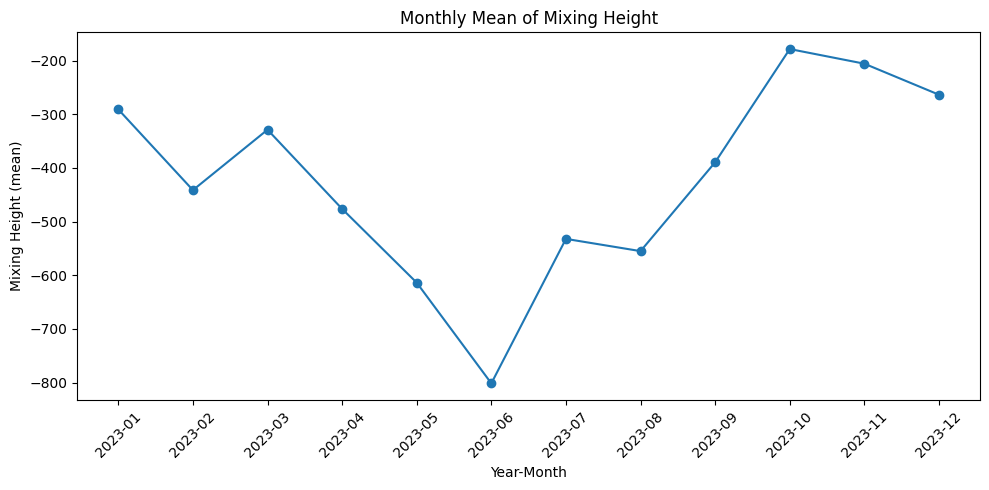

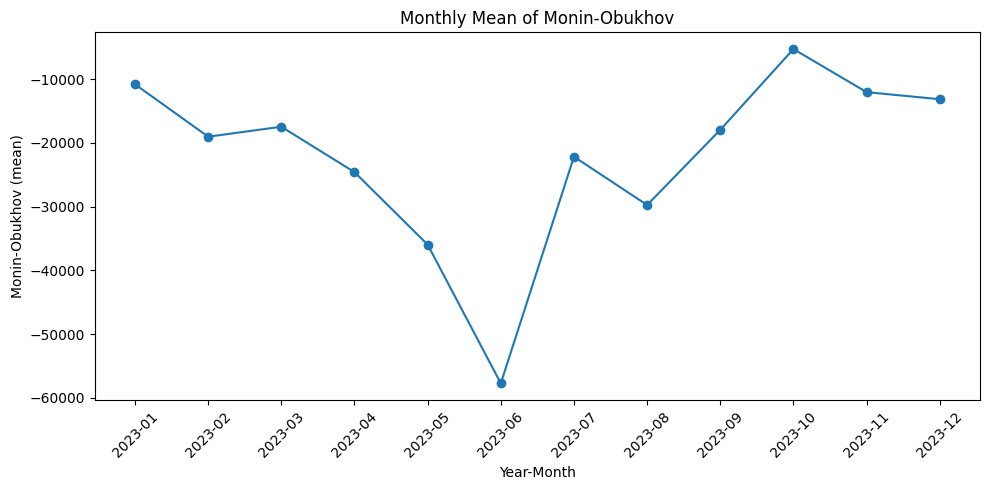

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna datetime para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Criando uma nova coluna para o ano e mês
df['year_month'] = df['datetime'].dt.to_period('M')

# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Adicionando a coluna year_month de volta ao DataFrame numérico
df_numeric['year_month'] = df['year_month']

# Calculando a média mensal
monthly_means = df_numeric.groupby('year_month').mean()

# Plotando a média mensal da coluna "mixing_height"
plt.figure(figsize=(10, 5))
plt.plot(monthly_means.index.astype(str), monthly_means['mixing_height'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Mixing Height (mean)')
plt.title('Monthly Mean of Mixing Height')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando a média mensal da coluna "Monin-Obukhov"
plt.figure(figsize=(10, 5))
plt.plot(monthly_means.index.astype(str), monthly_means['Monin-Obukhov'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Monin-Obukhov (mean)')
plt.title('Monthly Mean of Monin-Obukhov')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np

# Carregar os dados do arquivo CSV
file_path = 'C:\\Users\\Dell\\OneDrive\\Documentos\\GitHub\\Polatm_RamonVieira\\inputs\\EZ_AERMOD_RamonVieira_2024-06-04\\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos quadrantes de vento em graus
quadrant_limits = [(0, 90), (90, 180), (180, 270), (270, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada quadrante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os quadrantes de vento
for lower_limit, upper_limit in quadrant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    quadrant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este quadrante
    albedo_mean = quadrant_data['albedo'].mean()
    bowen_ratio_mean = quadrant_data['Bowen ratio'].mean()
    roughness_mean = quadrant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Imprimir os valores médios para cada quadrante de vento
for i, (lower_limit, upper_limit) in enumerate(quadrant_limits):
    print(f"Quadrante {i+1} (Direção do vento de {lower_limit}° a {upper_limit}°):")
    print(f"Albedo médio: {albedo_means[i]}")
    print(f"Razão de Bowen média: {bowen_ratio_means[i]}")
    print(f"Rugosidade média: {roughness_means[i]}")
    print()


Quadrante 1 (Direção do vento de 0° a 90°):
Albedo médio: 0.687860048820179
Razão de Bowen média: 0.2138893409275834
Rugosidade média: 0.5246801464605371

Quadrante 2 (Direção do vento de 90° a 180°):
Albedo médio: 0.6534992679355783
Razão de Bowen média: 0.21633967789165442
Rugosidade média: 0.49427764763299176

Quadrante 3 (Direção do vento de 180° a 270°):
Albedo médio: 0.6270252403846153
Razão de Bowen média: 0.21925480769230765
Rugosidade média: 0.39361171875

Quadrante 4 (Direção do vento de 270° a 360°):
Albedo médio: 0.5472070484581497
Razão de Bowen média: 0.225101321585903
Rugosidade média: 0.4013091923641704



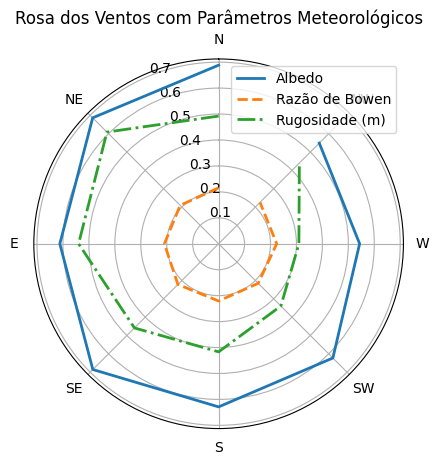

Octante N:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.22
Média de Rugosidade (m): 0.49

Octante NE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.21
Média de Rugosidade (m): 0.61

Octante E:
Média de Albedo: 0.61
Média de Razão de Bowen: 0.21
Média de Rugosidade (m): 0.54

Octante SE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.22
Média de Rugosidade (m): 0.46

Octante S:
Média de Albedo: 0.63
Média de Razão de Bowen: 0.22
Média de Rugosidade (m): 0.42

Octante SW:
Média de Albedo: 0.62
Média de Razão de Bowen: 0.22
Média de Rugosidade (m): 0.34

Octante W:
Média de Albedo: 0.54
Média de Razão de Bowen: 0.22
Média de Rugosidade (m): 0.31

Octante NW:
Média de Albedo: 0.55
Média de Razão de Bowen: 0.23
Média de Rugosidade (m): 0.44



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = 'C:\\Users\\Dell\\OneDrive\\Documentos\\GitHub\\Polatm_RamonVieira\\inputs\\EZ_AERMOD_RamonVieira_2024-06-04\\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos octantes de vento em graus
octant_limits = [(0, 45), (45, 90), (90, 135), (135, 180), (180, 225), (225, 270), (270, 315), (315, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada octante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os octantes de vento
for lower_limit, upper_limit in octant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    octant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este octante
    albedo_mean = octant_data['albedo'].mean()
    bowen_ratio_mean = octant_data['Bowen ratio'].mean()
    roughness_mean = octant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Definir os rótulos dos octantes
octant_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Definir os ângulos para cada octante da rosa dos ventos (com o Norte para cima)
angles = np.radians([0, 45, 90, 135, 180, 225, 270, 315])

# Criar o gráfico da rosa dos ventos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plotar os dados de albedo
ax.plot(angles, albedo_means, label='Albedo', linestyle='-', linewidth=2)

# Plotar os dados de razão de Bowen
ax.plot(angles, bowen_ratio_means, label='Razão de Bowen', linestyle='--', linewidth=2)

# Plotar os dados de rugosidade
ax.plot(angles, roughness_means, label='Rugosidade (m)', linestyle='-.', linewidth=2)

# Adicionar grade radial e definir as legendas
ax.grid(True)
ax.legend()

# Definir os rótulos dos ângulos
ax.set_xticks(angles)
ax.set_xticklabels(octant_labels)

# Inverter a direção do ângulo para que o Norte fique para cima
ax.set_theta_zero_location('N')

# Adicionar título ao gráfico
ax.set_title('Rosa dos Ventos com Parâmetros Meteorológicos')

# Mostrar o gráfico
plt.show()

# Iterar sobre os octantes de vento
for i, (label, albedo_mean, bowen_ratio_mean, roughness_mean) in enumerate(zip(octant_labels, albedo_means, bowen_ratio_means, roughness_means)):
    print(f'Octante {label}:')
    print(f'Média de Albedo: {albedo_mean:.2f}')
    print(f'Média de Razão de Bowen: {bowen_ratio_mean:.2f}')
    print(f'Média de Rugosidade (m): {roughness_mean:.2f}')
    print()


['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


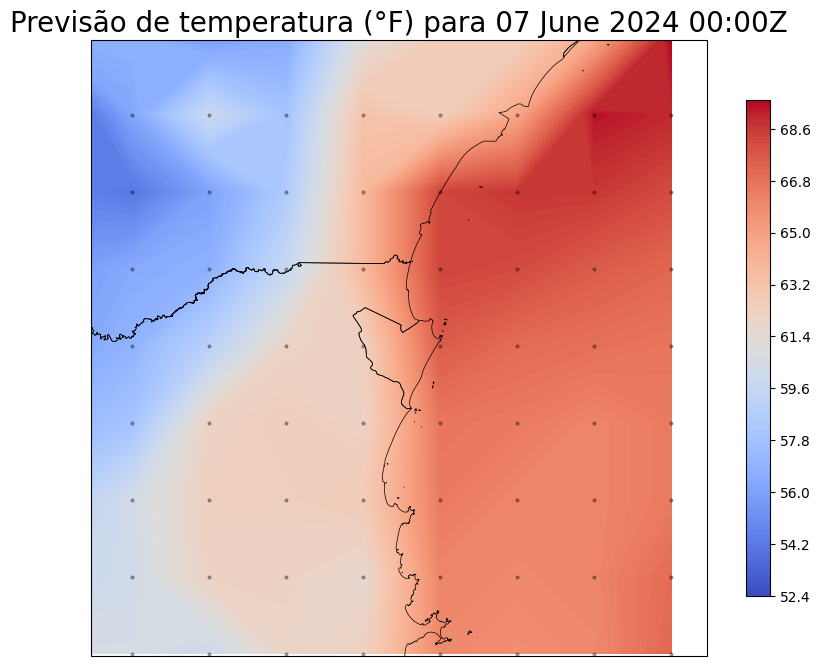

In [34]:
# Gerando mapa de temperatura para a região do município de São Francisco do Sul

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
import cartopy.io.shapereader  # Importe cartopy.io.shapereader

from siphon.catalog import TDSCatalog

# Acessando o catálogo GFS
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

# Selecionando o melhor conjunto de dados
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

# Criando uma consulta
query = ncss.query()

# Configurando a caixa geográfica para São Francisco do Sul
query.lonlat_box(north=-25.2578, south=-27.2578, east=-47.6346, west=-49.6346).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

# Obtendo os dados
data = ncss.get_data(query)
print(list(data.variables))

# Extraindo a variável de temperatura
temp_var = data.variables['Temperature_surface']

# Extraindo o nome da variável de tempo do atributo de coordenadas da variável de temperatura
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Extraindo os valores de dados reais e removendo quaisquer dimensões de tamanho 1
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convertendo o número de horas desde o tempo de referência para uma data real
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convertendo temperaturas de Kelvin para Fahrenheit
temp_vals = temp_vals * 1.8 - 459.67

# Combinando latitude e longitude 1D em uma grade 2D de locais
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Criando uma nova figura com tamanho reduzido
fig = plt.figure(figsize=(10, 8))

# Adicionando o mapa e configurando a extensão para as novas coordenadas
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-49.6346, -47.6346, -27.2578, -25.2578])

# Carregar os limites dos municípios de Santa Catarina a partir de um arquivo shapefile
municipios_sc = cartopy.io.shapereader.Reader('C:\\Users\\Dell\\OneDrive\\Documentos\\GitHub\\Polatm_RamonVieira\\inputs\\shapefile\\sao_francisco_do_sul.shp')

# Adicionar os limites dos municípios ao plot
ax.add_geometries(municipios_sc.geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)


# Contornando a temperatura em cada lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm')

# Adicionando uma barra de cores para mostrar a temperatura e reduzindo o tamanho dela
plt.colorbar(cf, ax=ax, fraction=0.032)

# Adicionando um título com o valor de tempo
ax.set_title(u'Previsão de temperatura (\u00b0F) para {0:%d %B %Y %H:%MZ}'.format(time_val), fontsize=20)

# Plotando marcadores para cada lat/long para mostrar os pontos da grade GFS de 0,25 graus
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2, alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

plt.show()

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


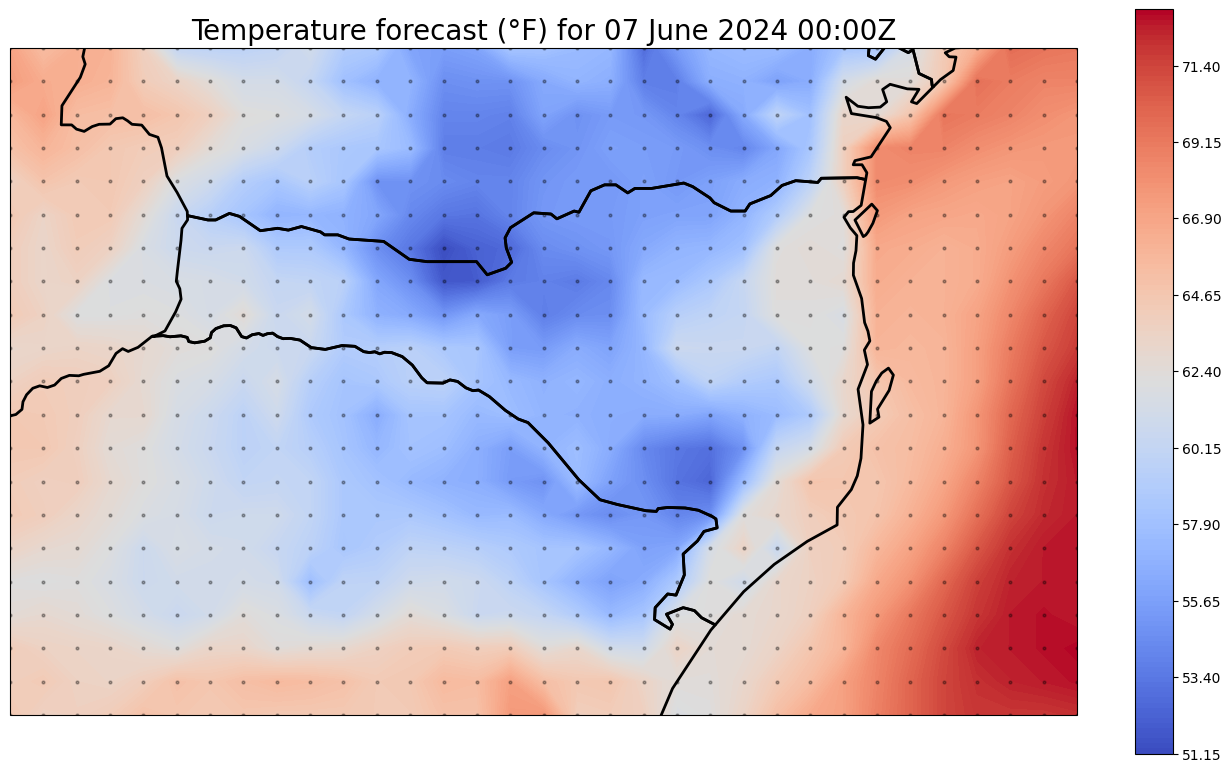

In [35]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-30, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55, -47, -30, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')
